## Load packages


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno ## visualization of missing values
%matplotlib inline

## Load datasets

In [46]:
train=pd.read_csv('../data/training_v2.csv')
test=pd.read_csv('../data/unlabeled.csv')
dictionary=pd.read_csv('../data/WiDS Datathon 2020 Dictionary.csv')

### Quick overview of the datasets

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
print('train shape:', train.shape)
display(train.head())
print('test shape:', test.shape)
display(test.head())
print('dictionary shape:', dictionary.shape)
display(dictionary.T)

train shape: (91713, 186)


encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

test shape: (39308, 186)


encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             2      127112            7             NaN  56.0  21.102439   
1             5      130737          178             NaN   NaN  19.500595   
2             7      101458           86             NaN  66.0  32.518596   
3             8       48067          163             NaN  64.0  20.798520   
4            10       25865           59             NaN  56.0        NaN   

   elective_surgery         ethnicity gender  height hospital_admit_source  \
0                 0         Caucasian      M   180.3  Emergency Department   
1                 1         Caucasian      F   145.0        Operating Room   
2                 1  African American      M   170.2        Operating Room   
3                 0         Caucasian      M   182.8        Operating Room   
4                 0         Caucasian      M     NaN  Emergency Department   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0       Accident & Emergency    1105         admit     Neuro ICU   
1  Operating Room / Recovery    1043         admit  Med-Surg ICU   
2  Operating Room / Recovery    1035         admit     CCU-CTICU   
3  Operating Room / Recovery    1078         admit  Med-Surg ICU   
4       Accident & Emergency    1012         admit     Neuro ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.104167                   0    68.6             3.7   
1          0.230556                   0    41.0             NaN   
2          0.140972                   0    94.2             NaN   
3          0.002083                   0    69.5             1.9   
4          0.004861                   0    66.4             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               301.0               405.01                      0         0.0   
1               217.0              1502.02                      1         0.0   
2               302.0              1208.06                      1         0.0   
3               303.0               211.03                      0         0.0   
4               217.0              1501.01                      1         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               NaN        19.0               0.67          NaN   
1               NaN         NaN                NaN          NaN   
2               NaN        22.0               1.84          NaN   
3               0.8        24.0               0.75          0.7   
4               NaN        11.0               0.52          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              2.0               5.0                0.0                1.0   
1              4.0               6.0                0.0                4.0   
2              2.0               5.0                0.0                1.0   
3              4.0               6.0                0.0                1.0   
4              1.0               4.0                0.0                1.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           276.0              105.0               42.0               0.0   
1             NaN               60.0                NaN               0.0   
2            81.0              124.0               39.2               0.0   
3           122.0              111.0               32.0               1.0   
4           192.0               94.0               32.8               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        57.0           NaN                  NaN          NaN        NaN   
1        53.0           NaN                  NaN          NaN        NaN   
2       115.0           NaN                  NaN          NaN        NaN   
3        48.0          36.0                 36.0        142.0       7.35   
4        41.0           NaN                  NaN         

dictionary shape: (188, 6)


0    \
Category                                                identifier   
Variable Name                                         encounter_id   
Unit of Measure                                               None   
Data Type                                                  integer   
Description      Unique identifier associated with a patient un...   
Example                                                       None   

                                                          1    \
Category                                           identifier   
Variable Name                                     hospital_id   
Unit of Measure                                          None   
Data Type                                             integer   
Description      Unique identifier associated with a hospital   
Example                                                  None   

                                                         2    \
Category                                          identifier   
Variable Name                                     patient_id   
Unit of Measure                                         None   
Data Type                                            integer   
Description      Unique identifier associated with a patient   
Example                                                 None   

                                                               3    \
Category                                               demographic   
Variable Name                                       hospital_death   
Unit of Measure                                               None   
Data Type                                                   binary   
Description      Whether the patient died during this hospitali...   
Example                                                          0   

                                                      4    \
Category                                      demographic   
Variable Name                                         age   
Unit of Measure                                     Years   
Data Type                                         numeric   
Description      The age of the patient on unit admission   
Example                                              None   

                                                               5    \
Category                                               demographic   
Variable Name                                                  bmi   
Unit of Measure                                 kilograms/metres^2   
Data Type                                                   string   
Description      The body mass index of the person on unit admi...   
Example                                                       21.5   

                                                               6    \
Category                                               demographic   
Variable Name                                     elective_surgery   
Unit of Measure                                               None   
Data Type                                                   binary   
Description      Whether the patient was admitted to the hospit...   
Example                                                          0   

                                                               7    \
Category                                               demographic   
Variable Name                                            ethnicity   
Unit of Measure                                               None   
Data Type                                                   string   
Description      The common national or cultural tradition whic...   
Example                                                  Caucasian   

                                                8    \
Category                                demographic   
Variable Name                                gender   
Unit of Measure                                None   
Data Type                                    string   


In [4]:
train.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  readmission_status        weight  \
count  91713.000000      91713.000000             91713.0  88993.000000   
mean     508.357692          0.835766                 0.0     84.028340   
std      228.989661          2.487756                 0.0     25.011497   
min       82.000000        -24.947222                 0.0     38.600000   
25%      369.000000          0.035417                 0.0     66.800000   
50%      504.000000          0.138889                 0.0     80.300000   
75%      679.000000          0.409028                 0.0     97.100000   
max      927.000000        159.090972                 0.0    186.000000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    37334.000000        90051.000000         90612.000000   
mean         2.902968          185.401739           558.216377   
std          0.681863           86.050882           463.266985   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           203.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative    arf_apache  bilirubin_apache   bun_apache  \
count           91713.000000  90998.000000      33579.000000  72451.00000   
mean                0.201106      0.027979          1.147721     25.82533   
std                 0.400829      0.164912          2.165538     20.67298   
min                 0.000000      0.000000          0.100000      4.00000   
25%                 0.000000      0.000000          0.400000     13.00000   
50%                 0.000000      0.000000          0.600000     19.00000   
75%                 0.000000      0.000000          1.100000     32.00000   
max                 1.000000      1.000000         51.000000    127.00000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       72860.000000  20845.000000     89812.000000      89812.000000   
mean            1.480014      0.595751         3.465049          5.471195   
std             1.525787      0.263238         0.951715          1.288376   
min             0.300000      0.210000         1.000000          1.000000   
25%             0.720000      0.400000         3.000000          6.000000   
50%             0.980000      0.500000         4.000000          6.000000   
75%             1.530000      0.850000         4.000000          6.000000   
max            11.180000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       90676.000000       89812.00000

In [5]:
test.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   39308.000000   39308.000000  39308.000000             0.0   
mean    65346.396891   65504.743462    107.102524             NaN   
std     37920.612047   37878.696746     64.949586             NaN   
min         2.000000      11.000000      1.000000             NaN   
25%     32568.500000   32590.250000     58.000000             NaN   
50%     65222.000000   65753.500000    115.000000             NaN   
75%     98174.500000   98270.250000    165.000000             NaN   
max    131050.000000  131050.000000    203.000000             NaN   

                age           bmi  elective_surgery        height  \
count  37654.000000  38222.000000      39308.000000  38558.000000   
mean      61.313991     28.947566          0.199908    169.518118   
std       16.828987      8.243995          0.399936     10.924032   
min       16.000000     14.844926          0.000000    137.200000   
25%       51.000000     23.474146          0.000000    162.500000   
50%       63.000000     27.412446          0.000000    170.000000   
75%       74.000000     32.518596          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  readmission_status        weight  \
count  39308.000000      39308.000000             39308.0  38544.000000   
mean    1020.677267          0.829561                 0.0     83.266194   
std       49.232587          2.538512                 0.0     24.872050   
min      906.000000        -82.028472                 0.0     38.600000   
25%      979.000000          0.069444                 0.0     66.000000   
50%     1019.000000          0.192361                 0.0     79.600000   
75%     1059.000000          0.450000                 0.0     96.100000   
max     1111.000000        175.627778                 0.0    186.000000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    14658.000000        38412.000000         38671.000000   
mean         2.843310          185.712329           584.282281   
std          0.707919           85.406424           473.550462   
min          1.200000          101.000000             0.010000   
25%          2.300000          113.000000           207.010000   
50%          2.900000          123.000000           410.010000   
75%          3.300000          301.000000           704.010000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative    arf_apache  bilirubin_apache    bun_apache  \
count           39308.000000  39129.000000      14016.000000  32292.000000   
mean                0.216572      0.028061          1.329411     25.476898   
std                 0.411913      0.165149          2.743675     20.726131   
min                 0.000000      0.000000          0.100000      4.000000   
25%                 0.000000      0.000000          0.447500     12.000000   
50%                 0.000000      0.000000          0.700000     18.000000   
75%                 0.000000      0.000000          1.200000     31.000000   
max                 1.000000      1.000000         60.200000    127.000000   

       creatinine_apache  fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       32412.000000  9590.000000     38145.000000      38145.000000   
mean            1.485251     0.595739         3.542928          5.516817   
std             1.582772     0.262257         0.908975          1.228821   
min             0.300000     0.210000         1.000000          1.000000   
25%             0.700000     0.400000         3.000000          6.000000   
50%             0.950000     0.500000         4.000000          6.000000   
75%             1.520000     0.850000         4.000000          6.000000   
max            11.180000     1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       38762.000000       38145.00000

From the above two tables, the distributions of numeric features are quite similar in both train and test. Therefor, I only do visualization for train set in Data Visualization section.

## Divide dataset accoring to the dictionary

In [47]:
## get the lists contain related features
identifier=list(dictionary[dictionary['Category']=='identifier']['Variable Name'].values)
demographic=list(dictionary[dictionary['Category']=='demographic']['Variable Name'].values)
demographic.remove('icu_admit_type') ## train and test sets don't contain this feature
APACHE_covariate=list(dictionary[dictionary['Category']=='APACHE covariate']['Variable Name'].values)
vitals=list(dictionary[dictionary['Category']=='vitals']['Variable Name'].values)
labs=list(dictionary[dictionary['Category']=='labs']['Variable Name'].values)
labs_blood_gas=list(dictionary[dictionary['Category']=='labs blood gas']['Variable Name'].values)
APACHE_prediction=list(dictionary[dictionary['Category']=='APACHE prediction']['Variable Name'].values)
APACHE_comorbidity=list(dictionary[dictionary['Category']=='APACHE comorbidity']['Variable Name'].values)
APACHE_grouping=list(dictionary[dictionary['Category']=='APACHE grouping']['Variable Name'].values)

## seperate train set
demographic_train=train[demographic]
identifier_train=train[identifier]
APACHE_covariate_train=train[APACHE_covariate]
vitals_train=train[vitals]
labs_train=train[labs]
labs_blood_gas_train=train[labs_blood_gas]
APACHE_prediction_train=train[APACHE_prediction]
APACHE_comorbidity_train=train[APACHE_comorbidity]
APACHE_grouping_train=train[APACHE_grouping]

## sperate test dataset
identifier_test=test[identifier]
demographic_test=test[demographic]
APACHE_covariate_test=test[APACHE_covariate]
vitals_test=test[vitals]
labs_test=test[labs]
labs_blood_gas_test=test[labs_blood_gas]
APACHE_prediction_test=test[APACHE_prediction]
APACHE_comorbidity_test=test[APACHE_comorbidity]
APACHE_grouping_test=test[APACHE_grouping]

## Visualization 
### Visualization of identifier features

In [12]:
train.encounter_id.nunique()

91713

In [13]:
train.patient_id.nunique()

91713

In [14]:
train.hospital_id.nunique()

147

encounter_id and patient_id are unique, both of them will not be used for modeling.

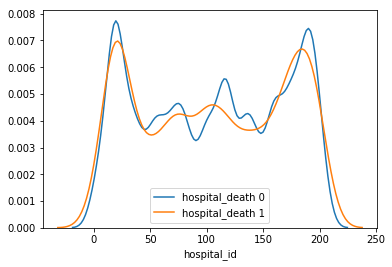

In [17]:
df_=pd.DataFrame()
df_['hospital_id']=train.hospital_id
df_['hospital_death']=train.hospital_death

df = df_[df_.hospital_death == 0]
sns.distplot(df['hospital_id'], hist =False, kde = True,  label='hospital_death 0')
df = df_[df_.hospital_death == 1]
sns.distplot(df['hospital_id'], hist =False, kde = True,  label='hospital_death 1')
plt.show()

### Visualization of demographic features

In [15]:
demographic_numeric=['age', 'bmi', 'height','pre_icu_los_days','icu_id','weight','hospital_death']
demographic_binary=['elective_surgery','readmission_status','hospital_death']
demographic_category=['ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','hospital_death']

In [16]:
demographic_numeric_train=demographic_train[demographic_numeric]
demographic_binary_train=demographic_train[demographic_binary]
demographic_category_train=demographic_train[demographic_category]

#### Numeric features

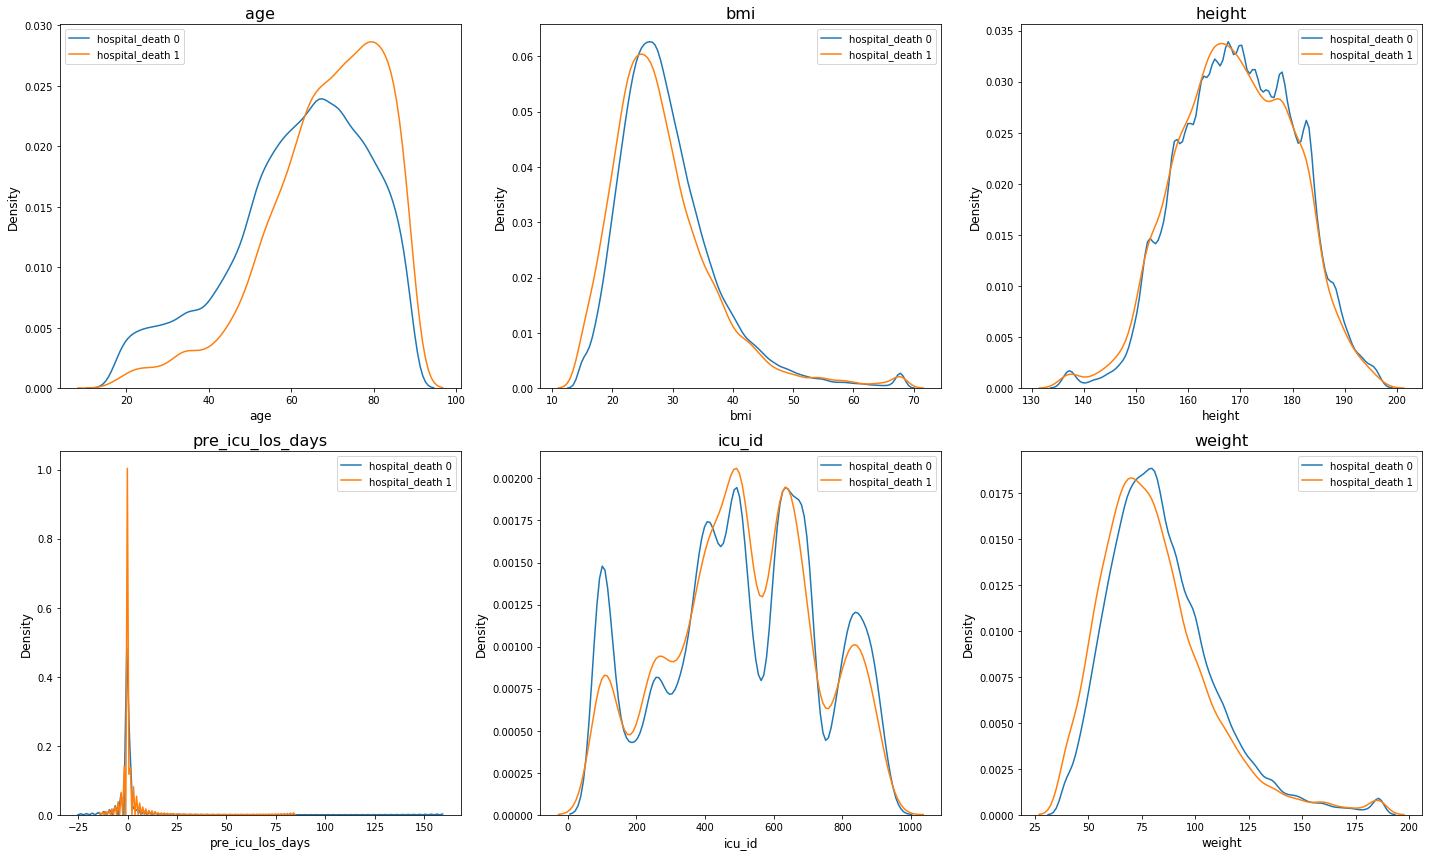

In [24]:
ls=list(demographic_numeric_train.columns)

fig= plt.subplots(figsize=(20, 12))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6))

for i in range(6):
    df = demographic_numeric_train[demographic_numeric_train.hospital_death == 0]
    sns.distplot(df[ls[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = demographic_numeric_train[demographic_numeric_train.hospital_death == 1]
    sns.distplot(df[ls[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()   

The distributions of pre_icu_los_day, age and icu_id between hospital_death = 0 and hospital_death = 1 are quite different.

#### Correlation between numeric features and hospital_death

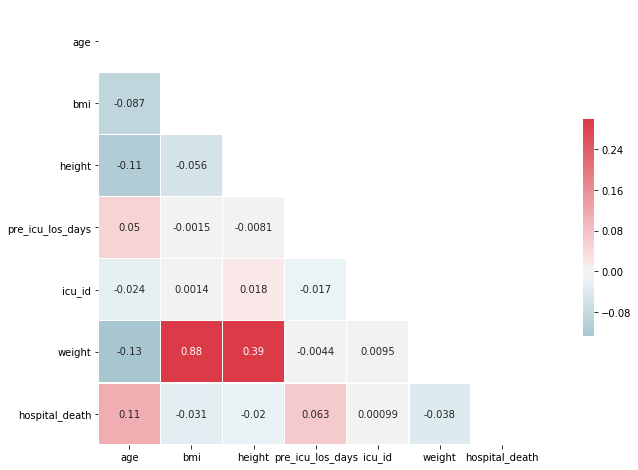

In [18]:
corr=demographic_numeric_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Categorical features 

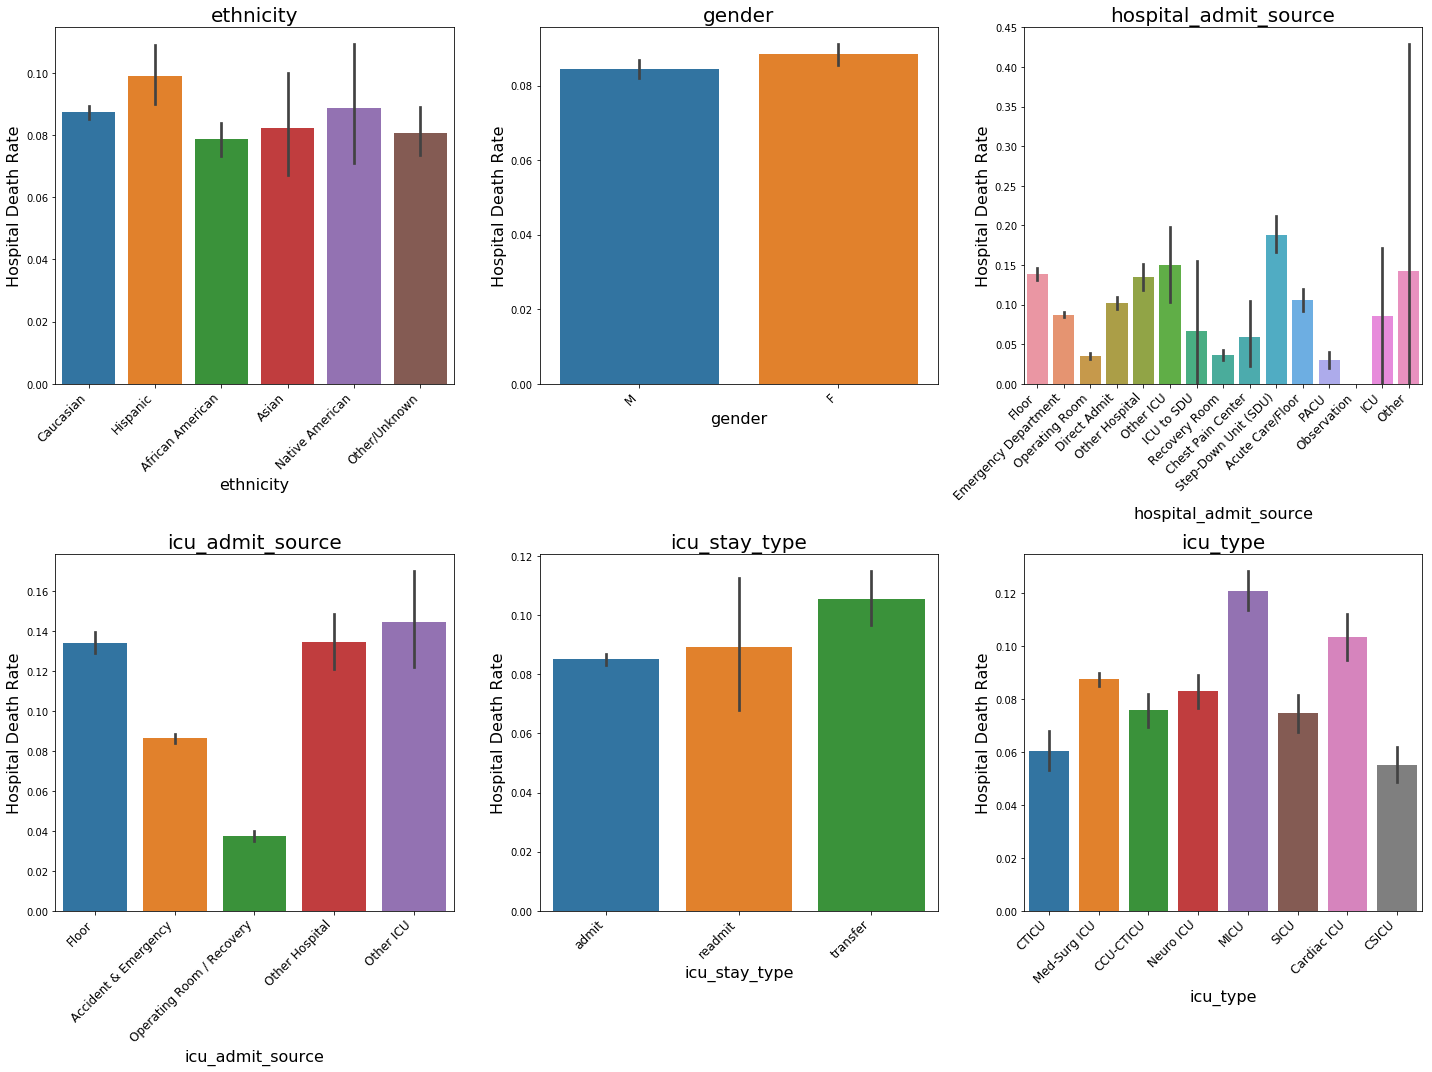

In [94]:
ls=list(demographic_category_train.columns)
fig= plt.subplots(figsize=(20, 15))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=demographic_category_train
for i in range(6):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    plt.setp(ax[i].xaxis.get_majorticklabels(),rotation=45,horizontalalignment='right', fontsize=12)
    
    plt.tight_layout()
    i += 1
    

plt.show()

From the above figures, the effect of gender, icu_stay_type and ethnicity seems limited. The effect of other three features varies among different categories.

#### Binary features

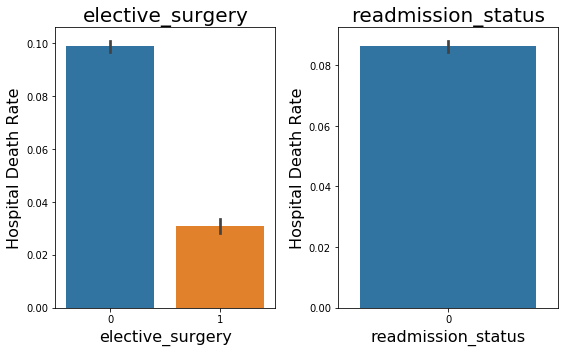

In [92]:
ls=list(demographic_binary_train.columns)
fig= plt.subplots(figsize=(8, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))


ax=[]
ax.extend((ax1,ax2))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=demographic_binary_train
for i in range(2):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    
    plt.tight_layout()
    i += 1
    

plt.show()

All the values of readmission_status are 0, so this feature can be removed before data analysis.

In [55]:
train=train.drop(['readmission_status'], axis=1 )

In [58]:
test.readmission_status.unique()

array([0], dtype=int64)

All the values of readmission_status are also 0, so it's very safe to remove this feature before modeling.

### Visualization of APACHE_covariate

In [101]:
APACHE_covariate_binary=['apache_post_operative','arf_apache','gcs_unable_apache','intubated_apache','ventilated_apache']

APACHE_covariate_category=['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache']

unwanted={'apache_post_operative','arf_apache','gcs_unable_apache','intubated_apache','ventilated_apache',
         'gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache'}
APACHE_covariate_numeric=list(APACHE_covariate_train.columns)
APACHE_covariate_numeric = [ele for ele in APACHE_covariate_numeric if ele not in unwanted] 

In [102]:
APACHE_covariate_binary_train=APACHE_covariate_train[APACHE_covariate_binary]
APACHE_covariate_numeric_train=APACHE_covariate_train[APACHE_covariate_numeric]
APACHE_covariate_category_train=APACHE_covariate_train[APACHE_covariate_category]

In [103]:
APACHE_covariate_binary_train['hospital_death']=train.hospital_death
APACHE_covariate_numeric_train['hospital_death']=train.hospital_death
APACHE_covariate_category_train['hospital_death']=train.hospital_death

#### Numeric features

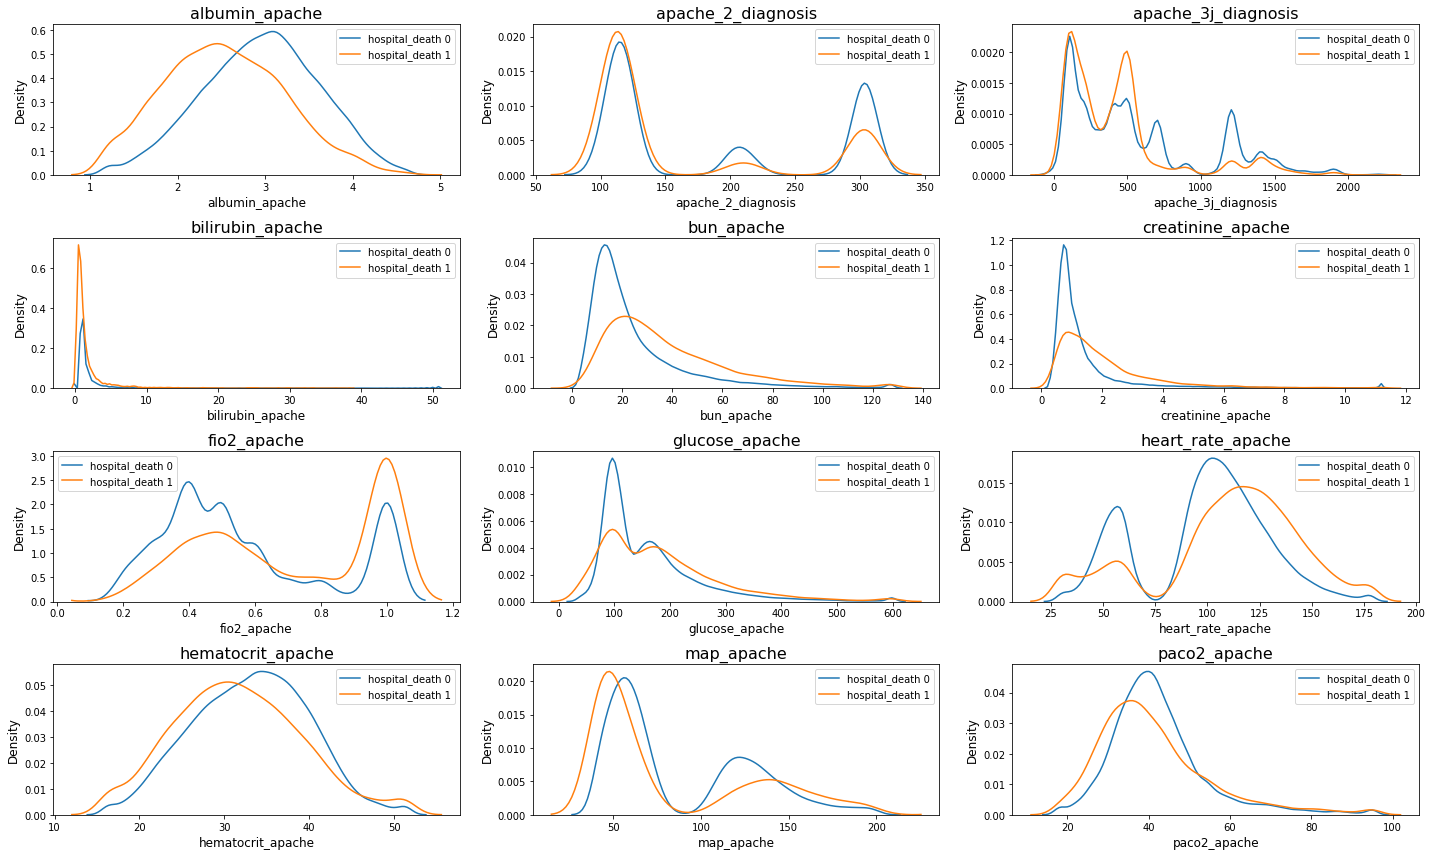

In [107]:
ls=list(APACHE_covariate_numeric_train.columns)
ls_1=ls[0:12]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = APACHE_covariate_numeric_train[APACHE_covariate_numeric_train.hospital_death == 0]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = APACHE_covariate_numeric_train[APACHE_covariate_numeric_train.hospital_death == 1]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_1[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_1[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

The distributions of albumin_apache, bilirubin_aphache and fio2_aphache between hospital_death = 0 and hospital_death = 1 are quite different.

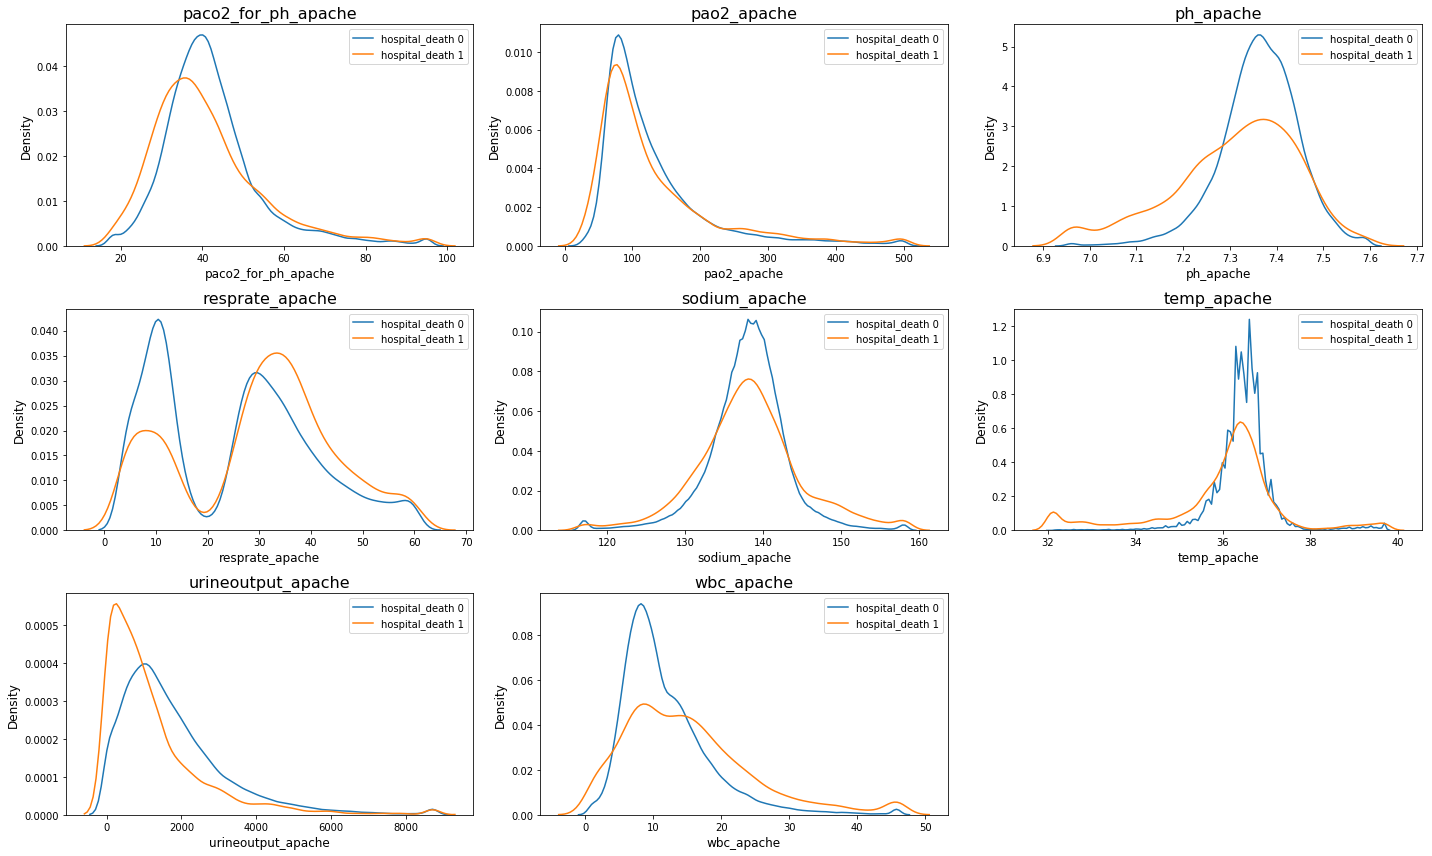

In [109]:
ls=list(APACHE_covariate_numeric_train.columns)
ls_2=ls[12:20]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))

for i in range(8):
    df = APACHE_covariate_numeric_train[APACHE_covariate_numeric_train.hospital_death == 0]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = APACHE_covariate_numeric_train[APACHE_covariate_numeric_train.hospital_death == 1]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_2[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_2[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

The distributions of wbc_apache, ph_aphache and temp_aphache between hospital_death = 0 and hospital_death = 1 are quite different.

#### Correlation between numeric features and hospital_death

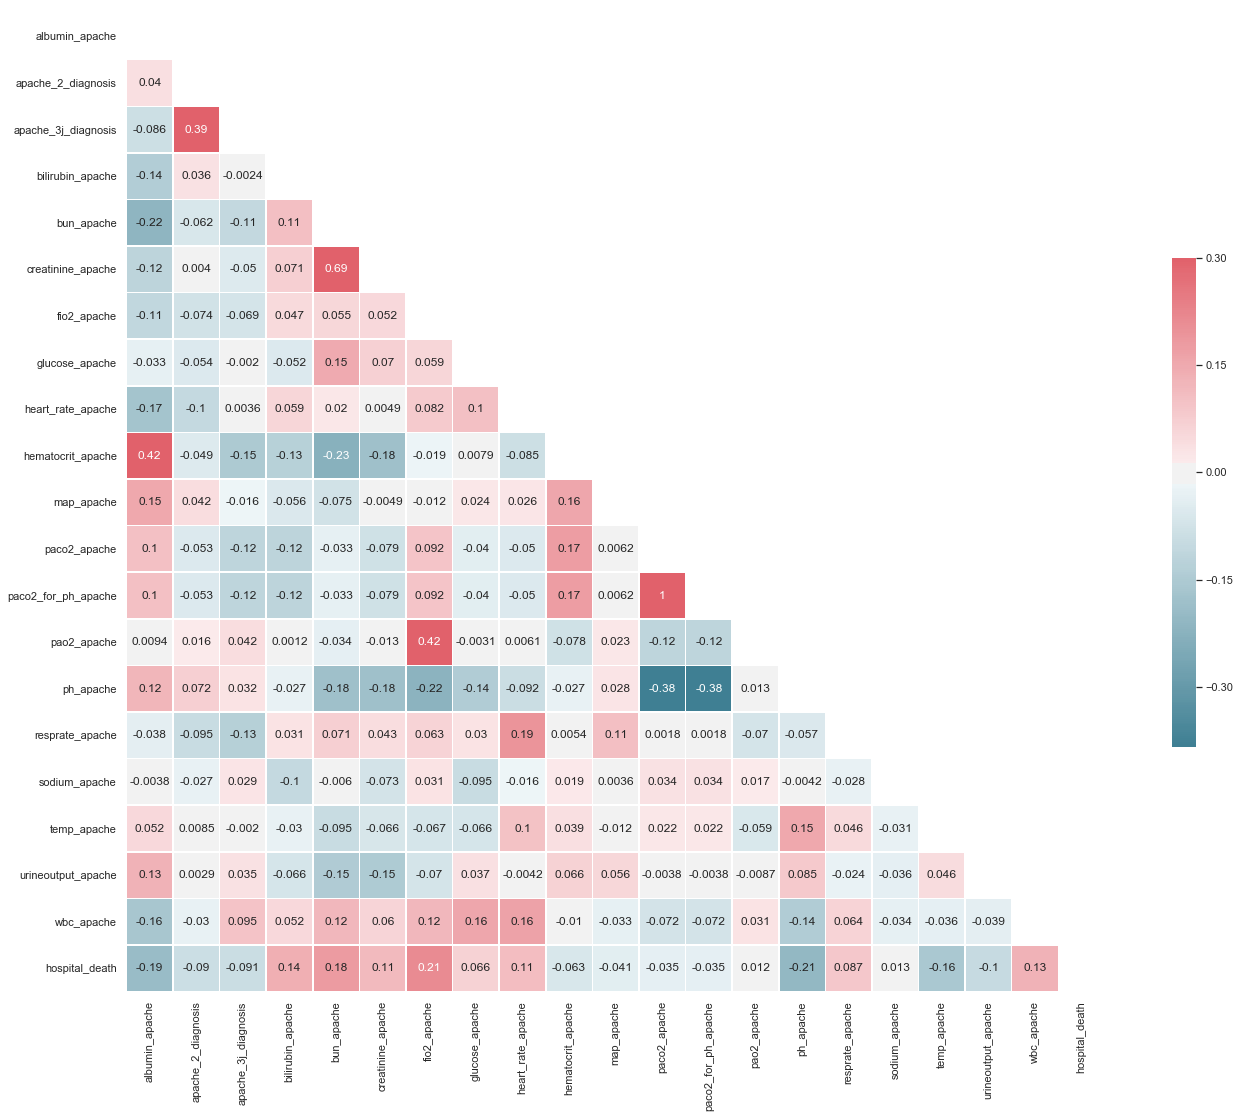

In [134]:
corr=APACHE_covariate_numeric_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(24, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Category features

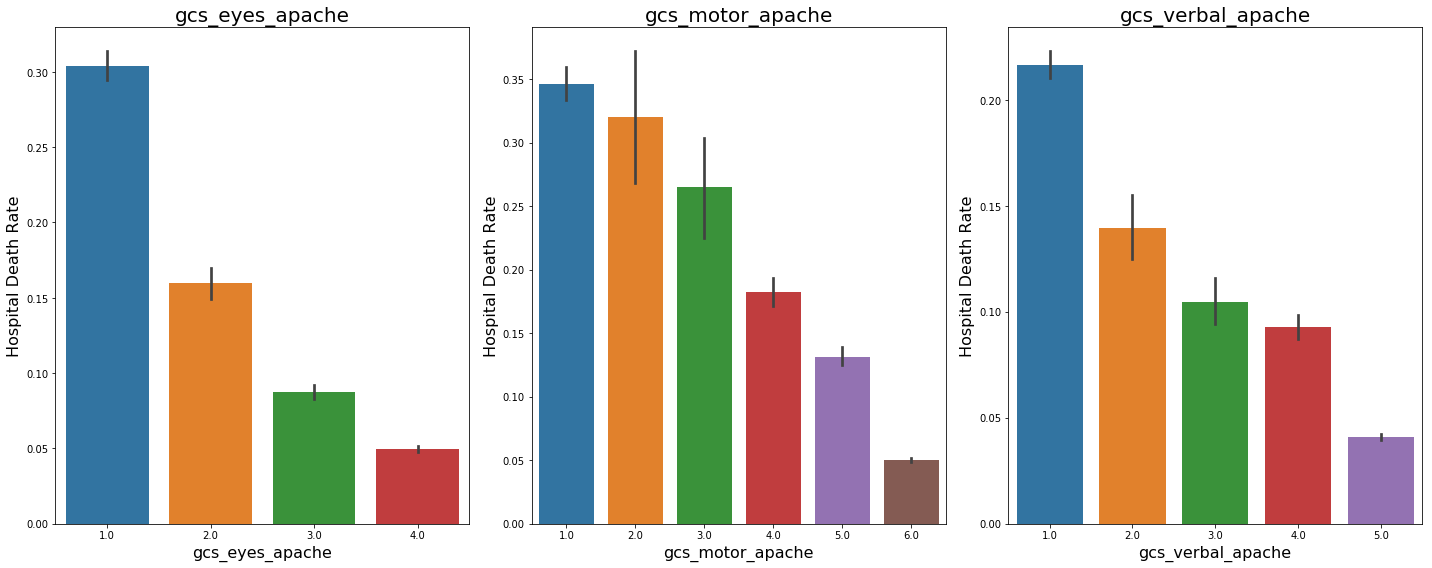

In [89]:
ls=list(APACHE_covariate_category_train.columns)
fig= plt.subplots(figsize=(20, 8))

ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))

ax=[]
ax.extend((ax1,ax2,ax3))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=APACHE_covariate_category_train
for i in range(3):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    
    plt.tight_layout()
    i += 1
    

plt.show()

From the above figures, the effect of all three features varies among different categories.

#### Binary features

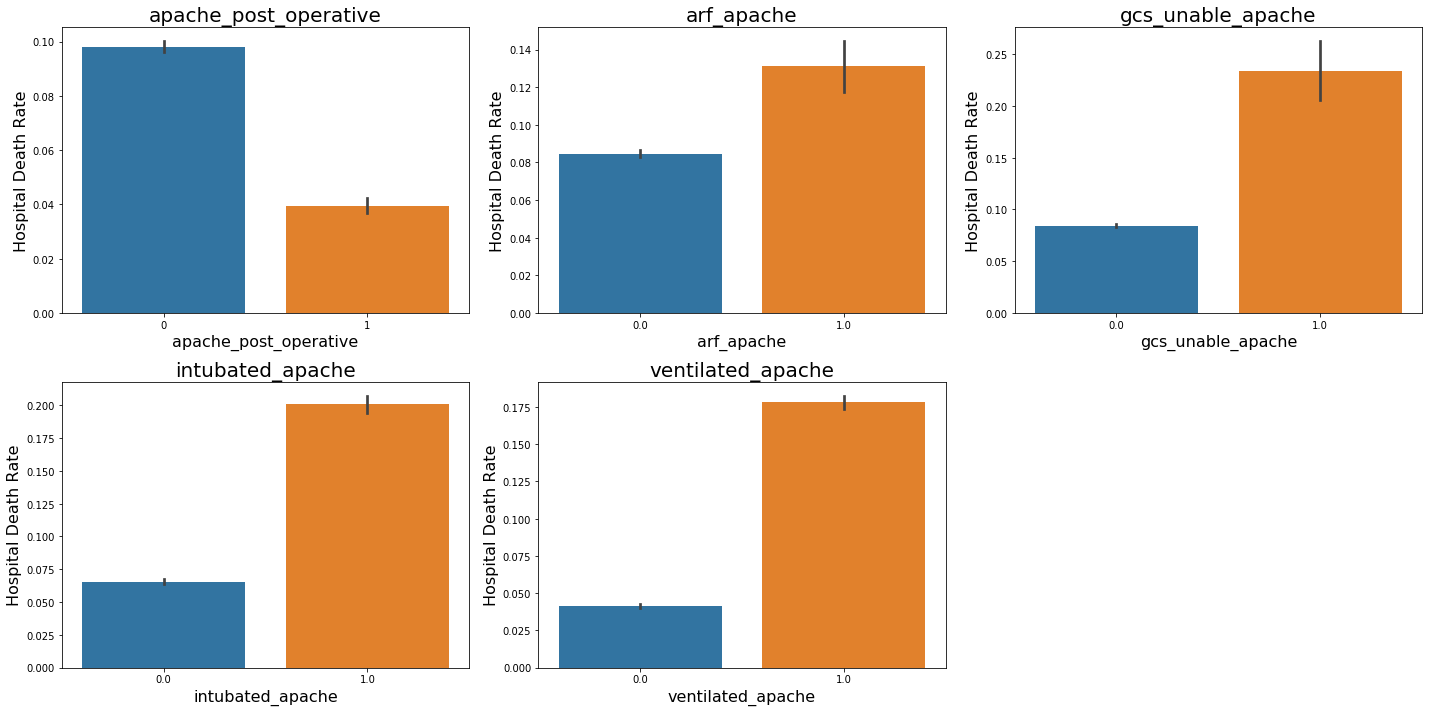

In [95]:
ls=list(APACHE_covariate_binary_train.columns)
fig= plt.subplots(figsize=(20, 10))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=APACHE_covariate_binary_train
for i in range(5):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    
    plt.tight_layout()
    i += 1
    

plt.show()

From the above figures, the hospital death rates are very different for category = 0 and category = 1 among all three binary features.

### Visualization of vitals features

In [14]:
## add hospital_death into vitals_train
vitals_train['hospital_death']=train.hospital_death

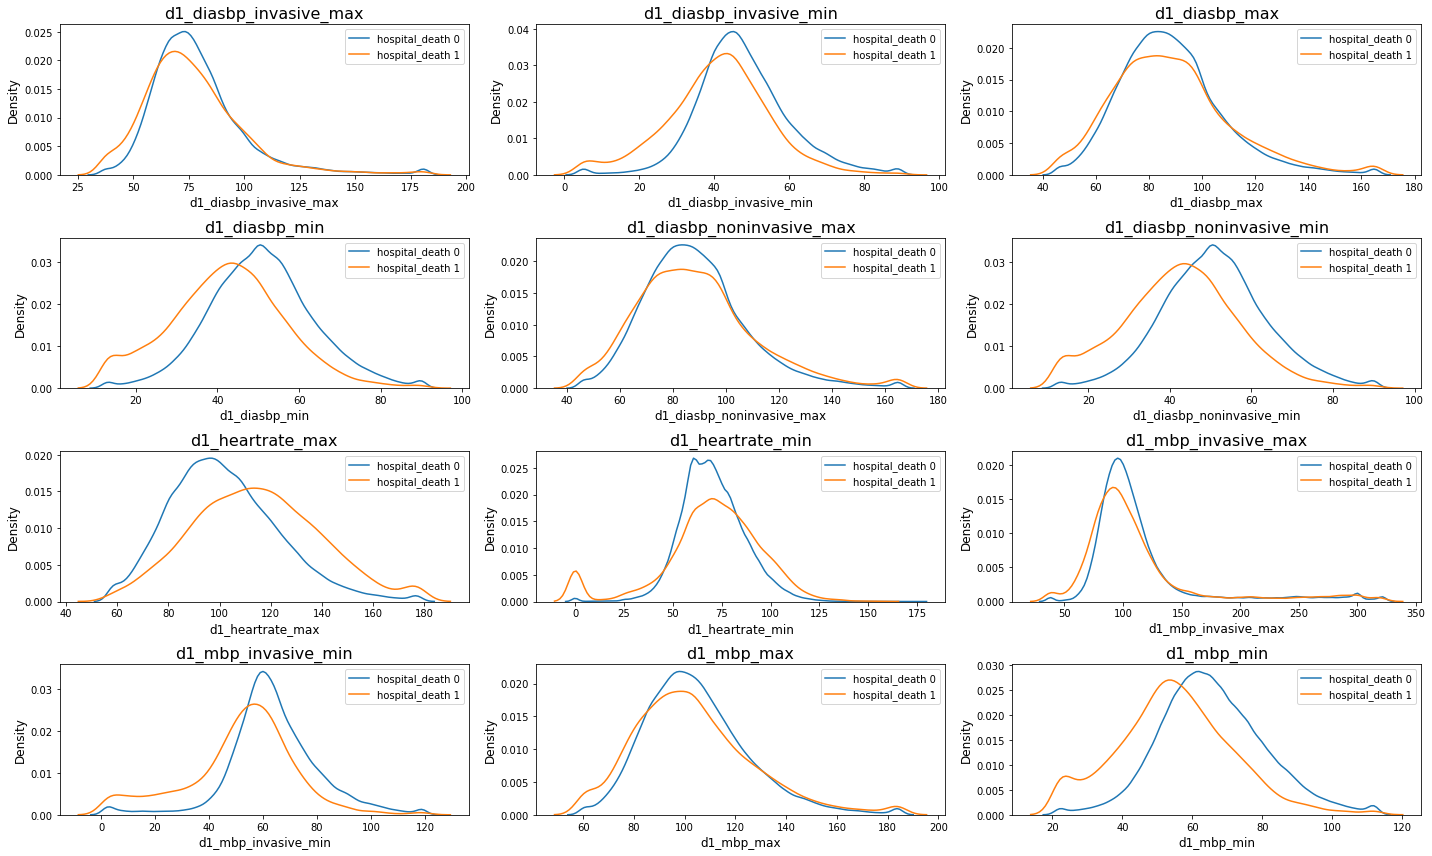

In [111]:
ls=list(vitals_train.columns)
ls_1=ls[0:12]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = vitals_train[vitals_train.hospital_death == 0]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = vitals_train[vitals_train.hospital_death == 1]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_1[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_1[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

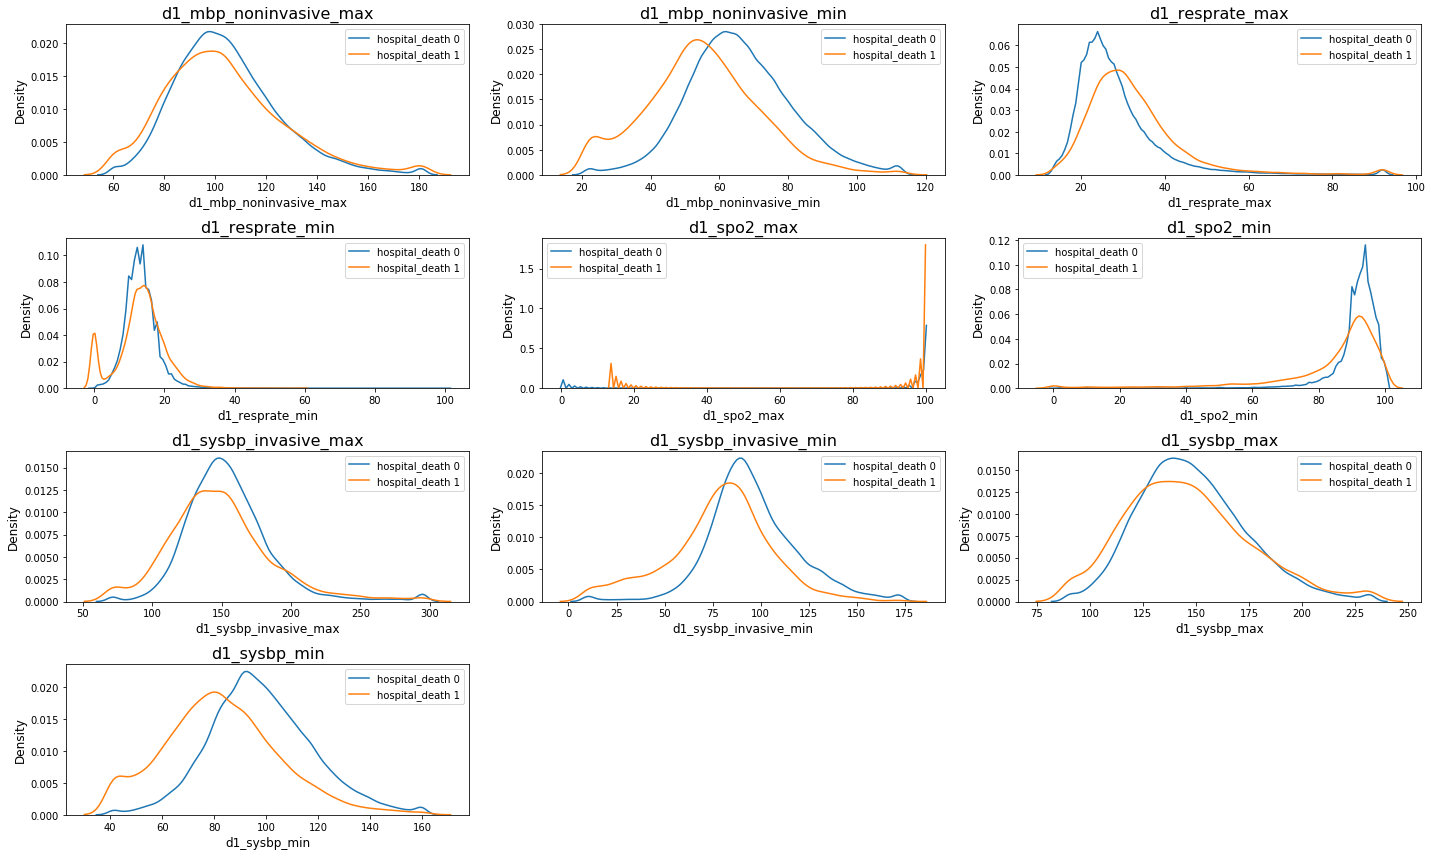

In [113]:
ls=list(vitals_train.columns)
ls_2=ls[12:22]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10))

for i in range(10):
    df = vitals_train[vitals_train.hospital_death == 0]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = vitals_train[vitals_train.hospital_death == 1]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_2[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_2[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

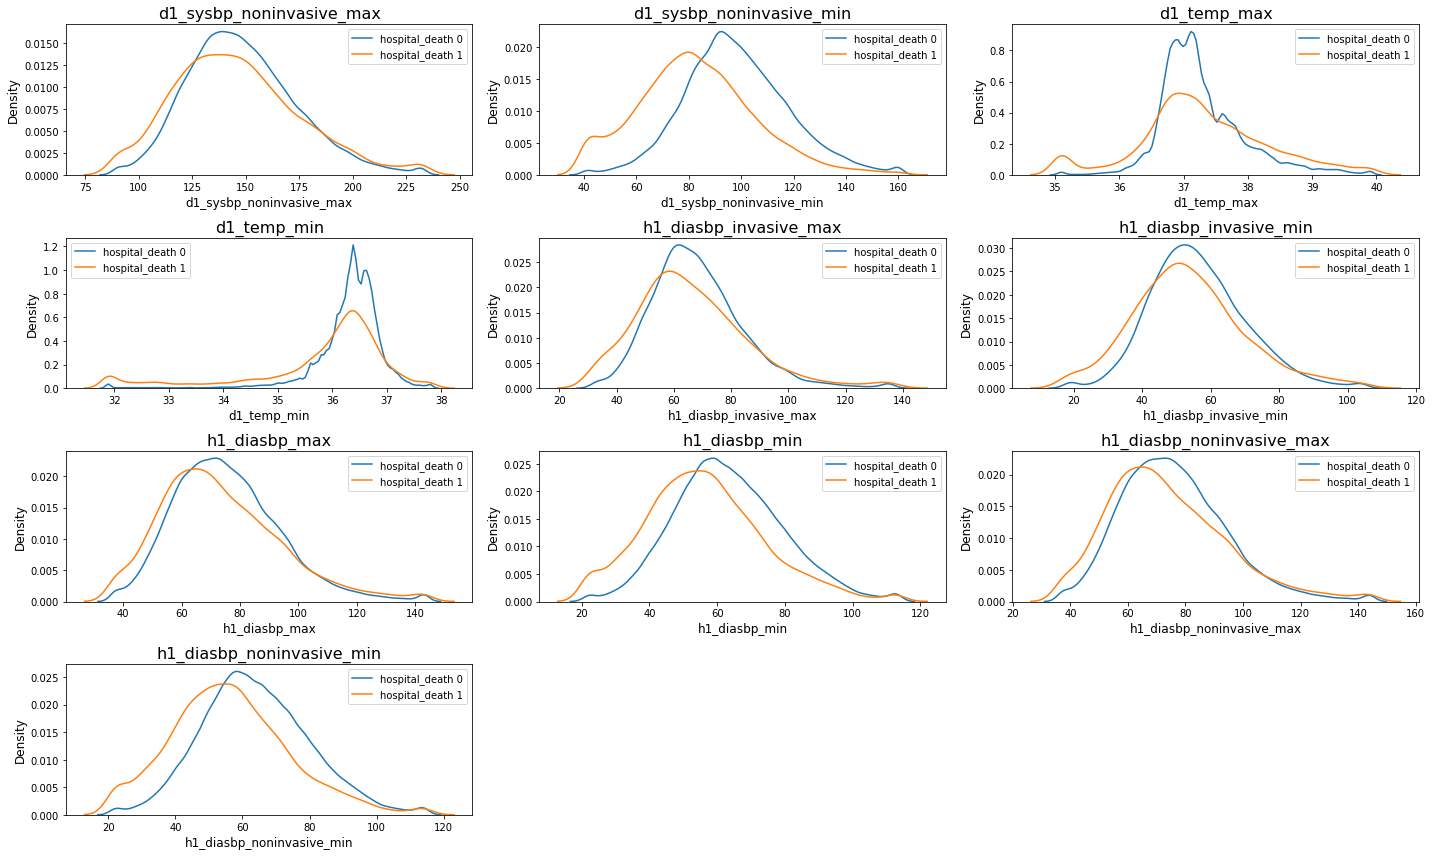

In [114]:
ls=list(vitals_train.columns)
ls_3=ls[22:32]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10))

for i in range(10):
    df = vitals_train[vitals_train.hospital_death == 0]
    sns.distplot(df[ls_3[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = vitals_train[vitals_train.hospital_death == 1]
    sns.distplot(df[ls_3[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_3[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_3[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

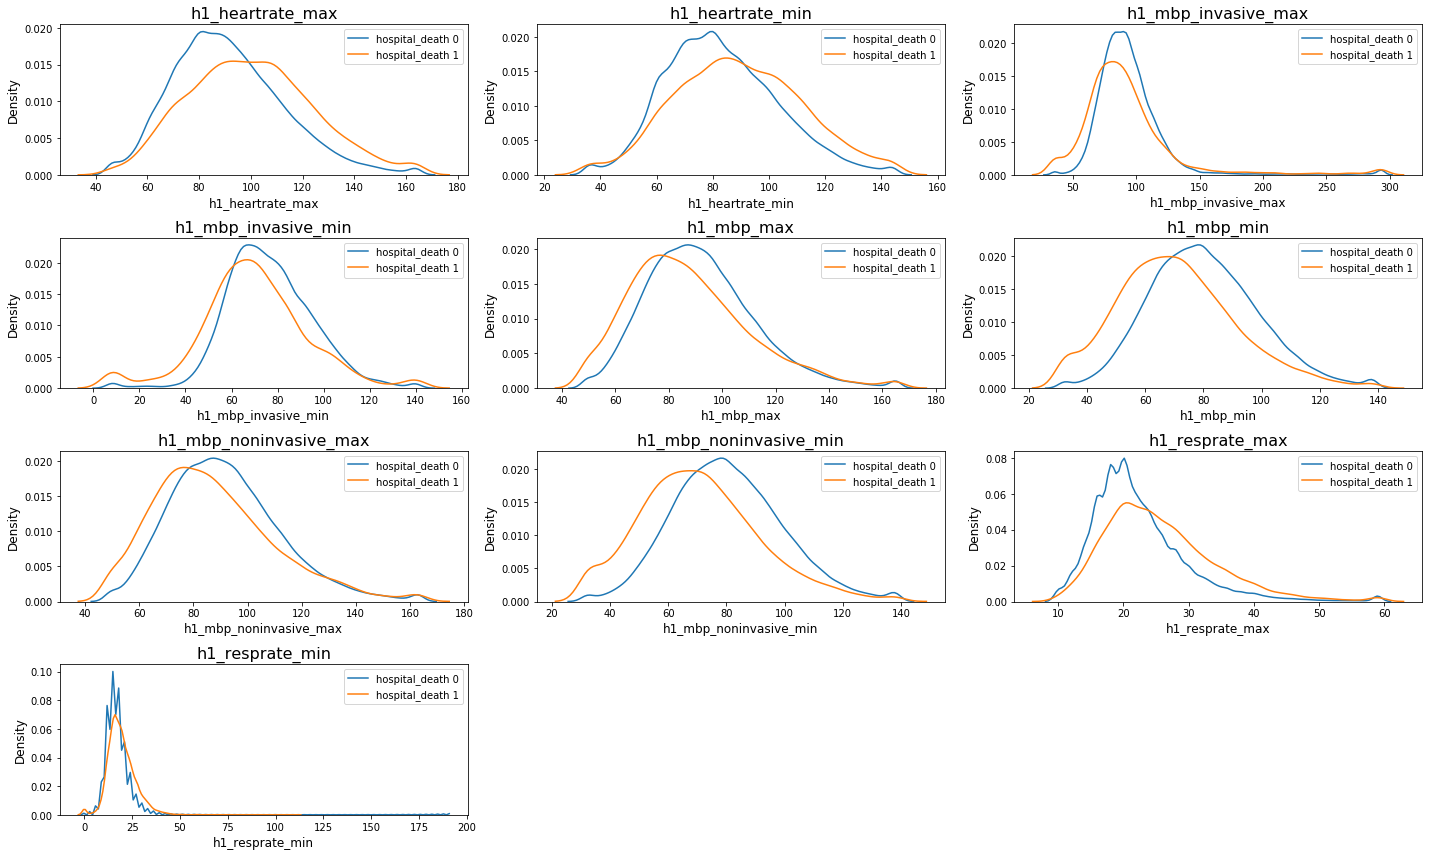

In [115]:
ls=list(vitals_train.columns)
ls_4=ls[32:42]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10))

for i in range(10):
    df = vitals_train[vitals_train.hospital_death == 0]
    sns.distplot(df[ls_4[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = vitals_train[vitals_train.hospital_death == 1]
    sns.distplot(df[ls_4[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_4[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_4[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

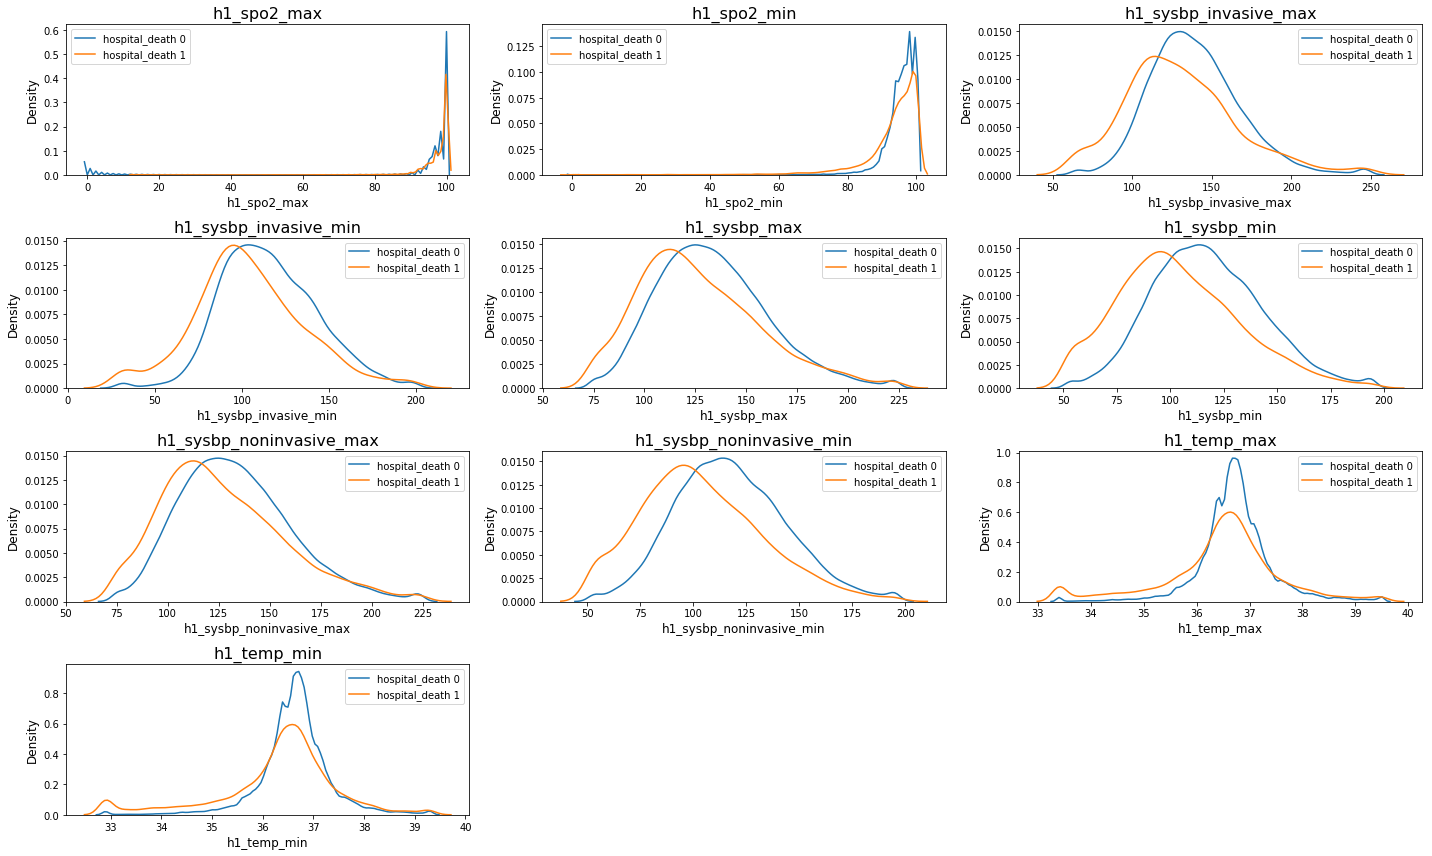

In [116]:
ls=list(vitals_train.columns)
ls_5=ls[42:52]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10))

for i in range(10):
    df = vitals_train[vitals_train.hospital_death == 0]
    sns.distplot(df[ls_5[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = vitals_train[vitals_train.hospital_death == 1]
    sns.distplot(df[ls_5[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_5[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_5[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

#### Correlation between vitals features and hospital_death

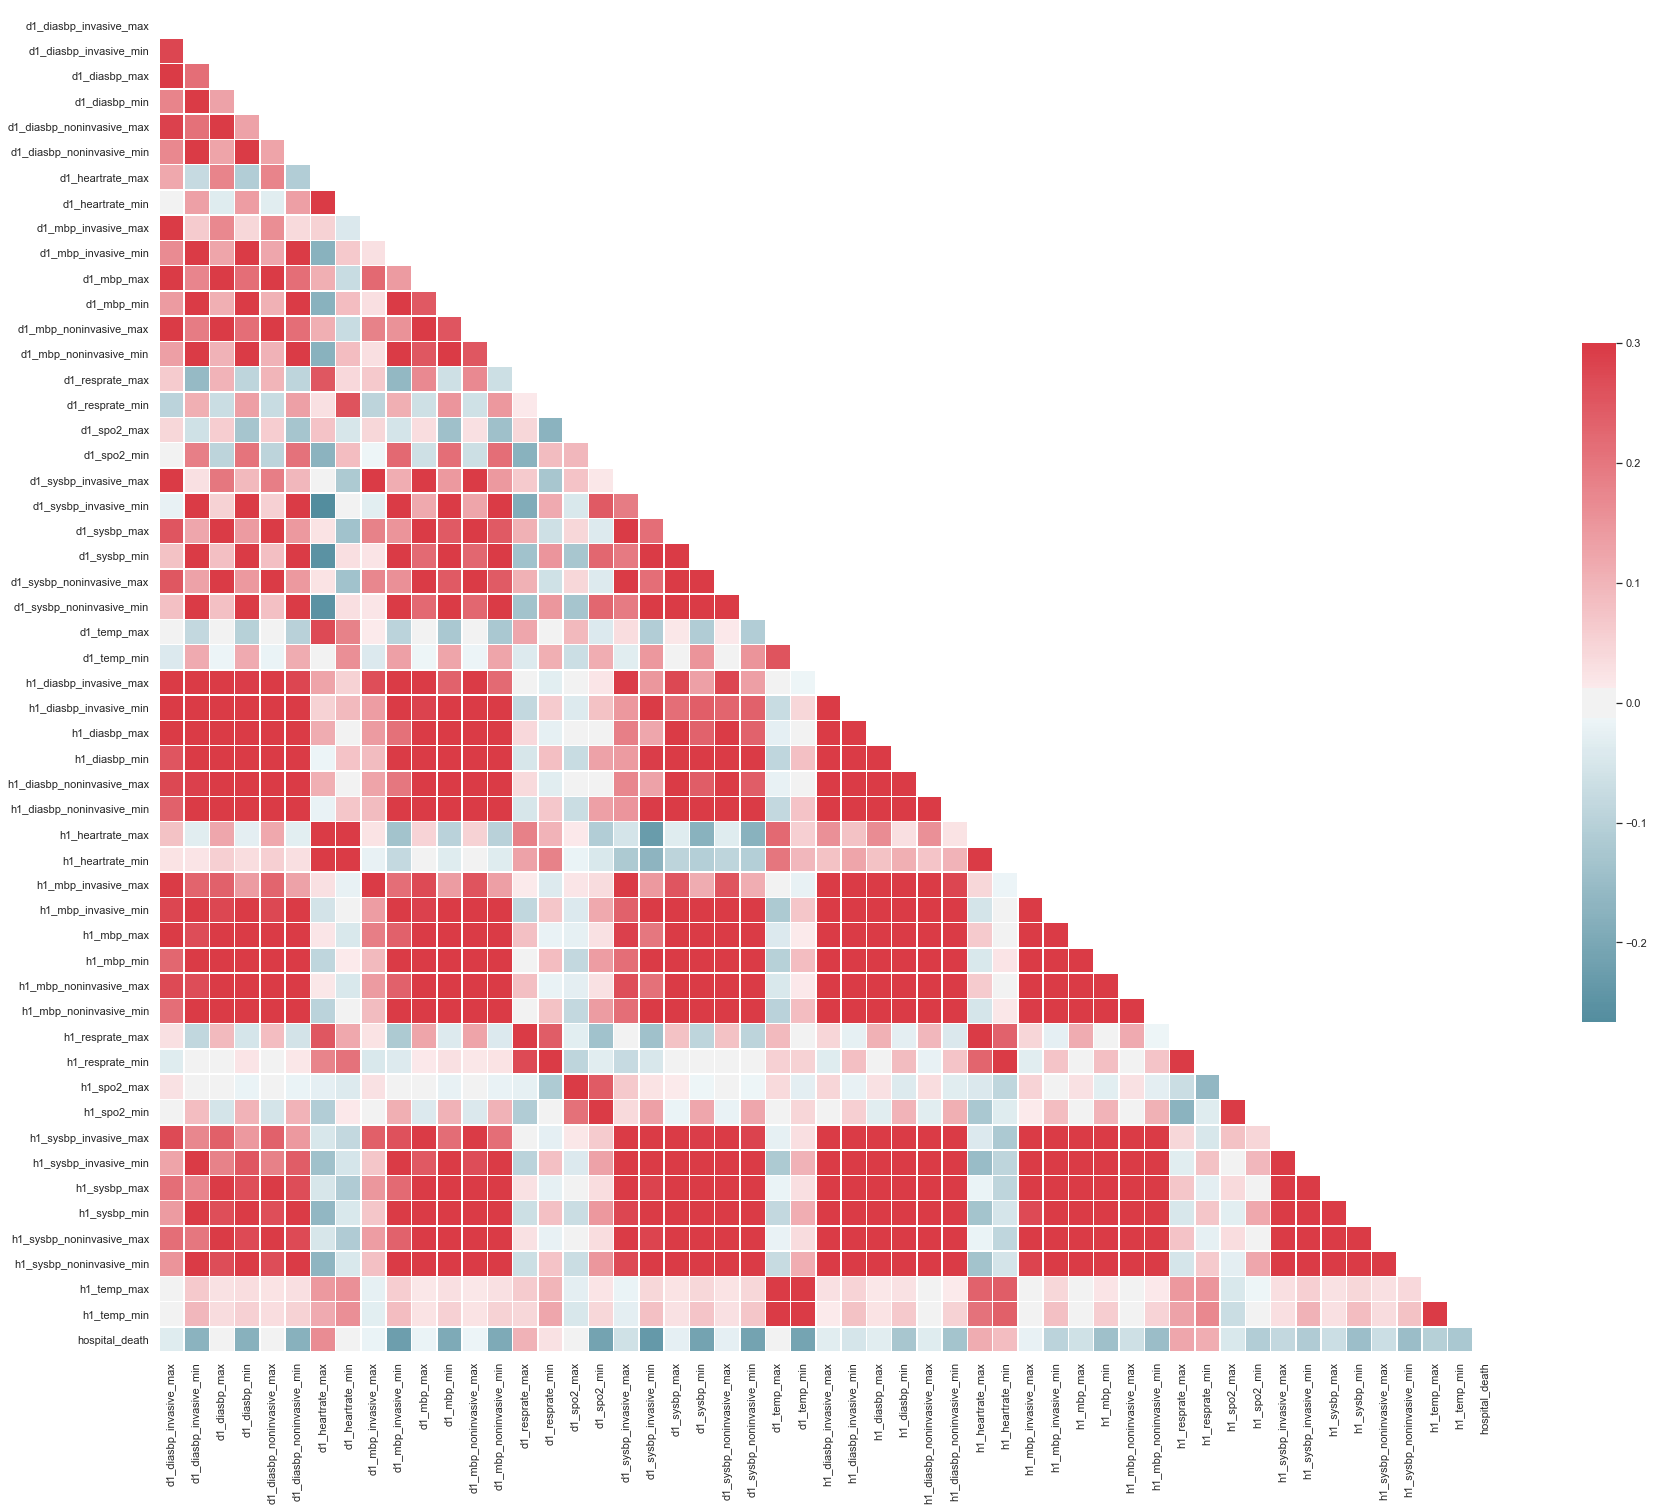

In [137]:
corr=vitals_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=False,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Many vitals features are highly correlated with each other. And some of them have high impact on hospital death.

### Visualization of labs features

In [26]:
## add hospital_death into vitals_train
labs_train['hospital_death']=train.hospital_death

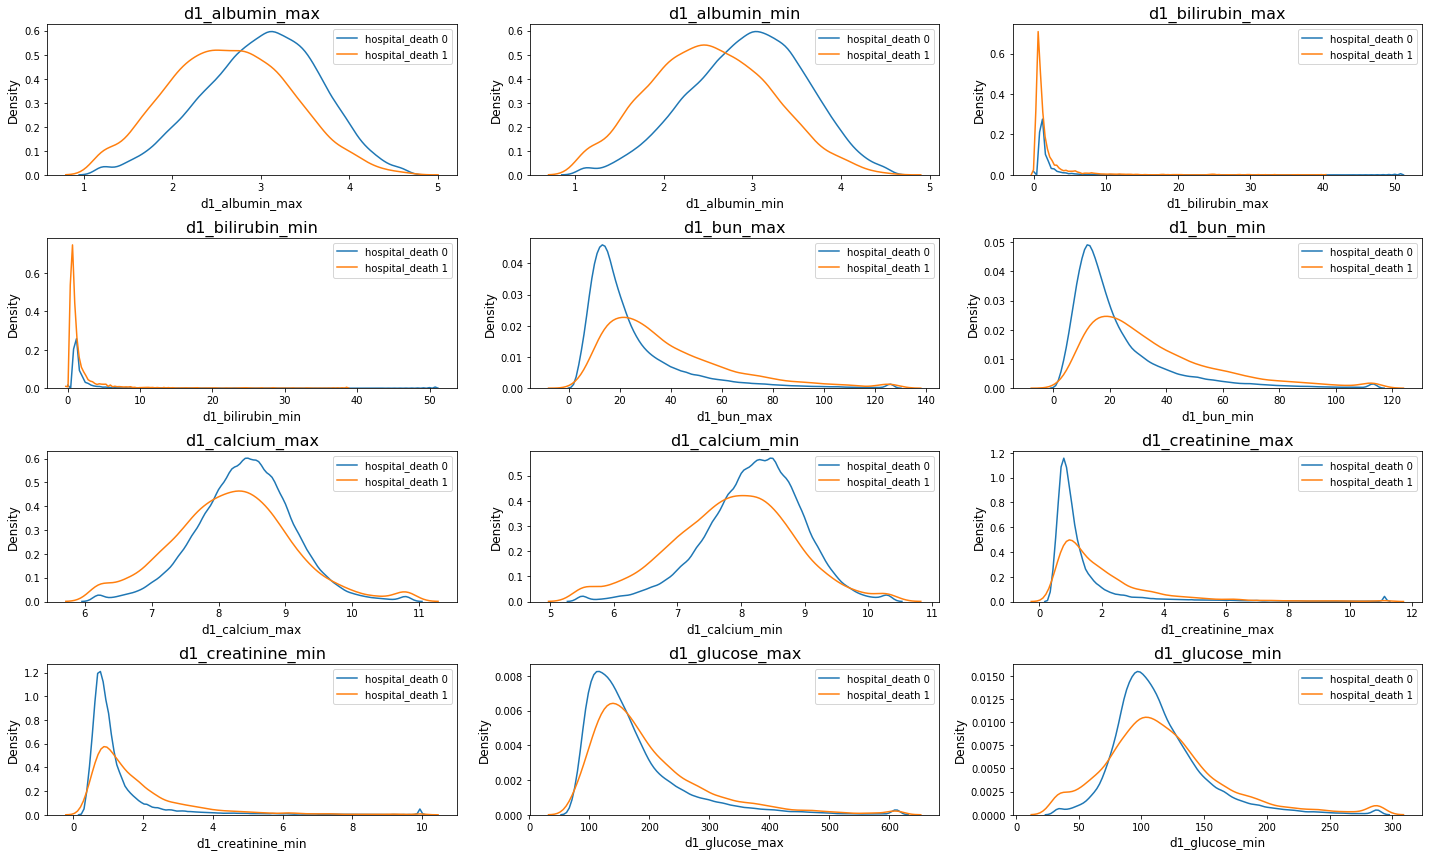

In [43]:
ls=list(labs_train.columns)
ls_1=ls[0:12]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = labs_train[labs_train.hospital_death == 0]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_train[labs_train.hospital_death == 1]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_1[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_1[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

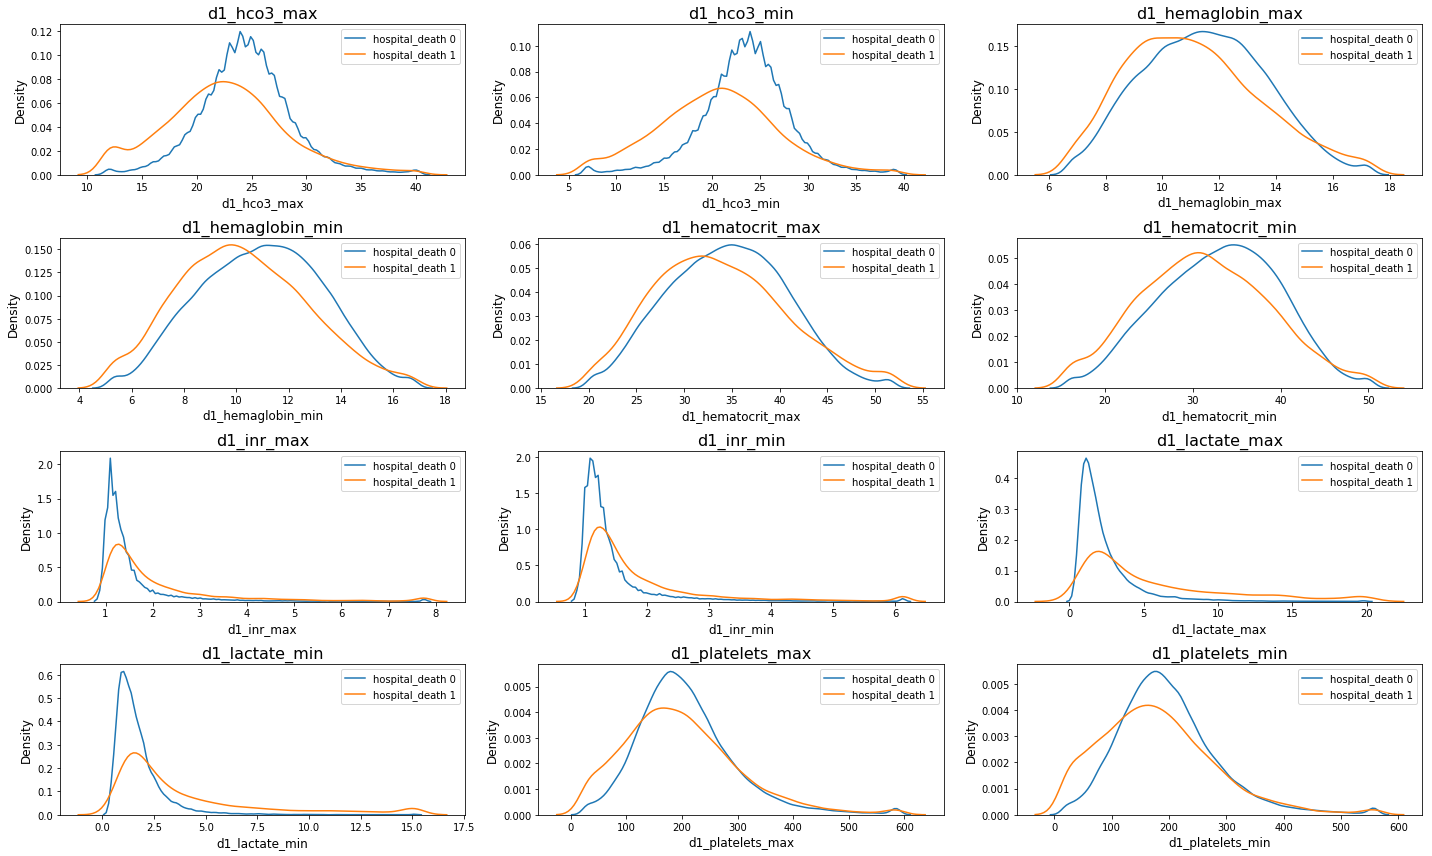

In [47]:
ls_2=ls[12:24]
fig= plt.subplots(figsize=(20, 12))
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = labs_train[labs_train.hospital_death == 0]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_train[labs_train.hospital_death == 1]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_2[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_2[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

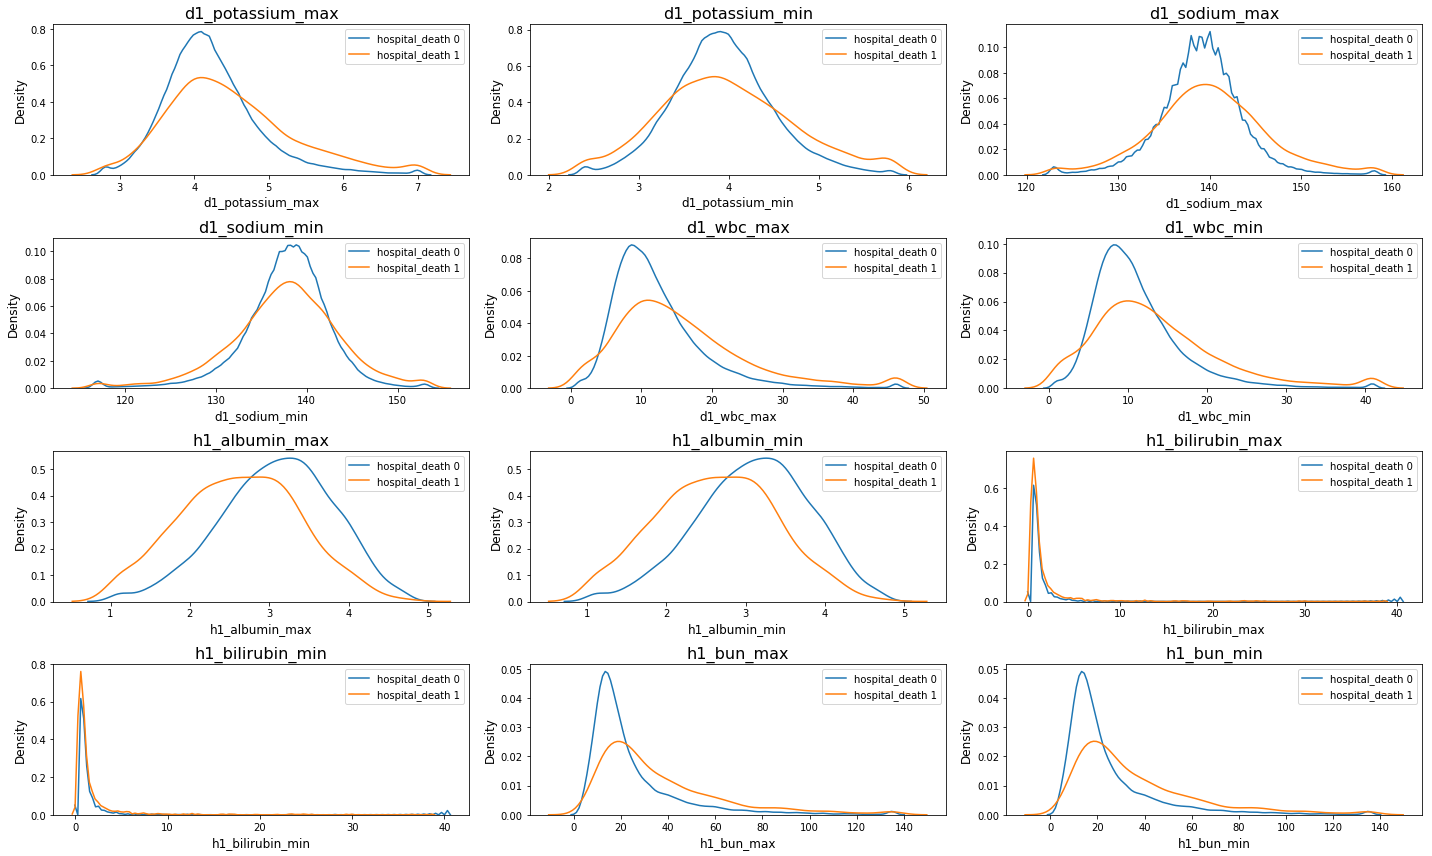

In [49]:
ls_3=ls[24:36]
fig= plt.subplots(figsize=(20, 12))
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = labs_train[labs_train.hospital_death == 0]
    sns.distplot(df[ls_3[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_train[labs_train.hospital_death == 1]
    sns.distplot(df[ls_3[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_3[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_3[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

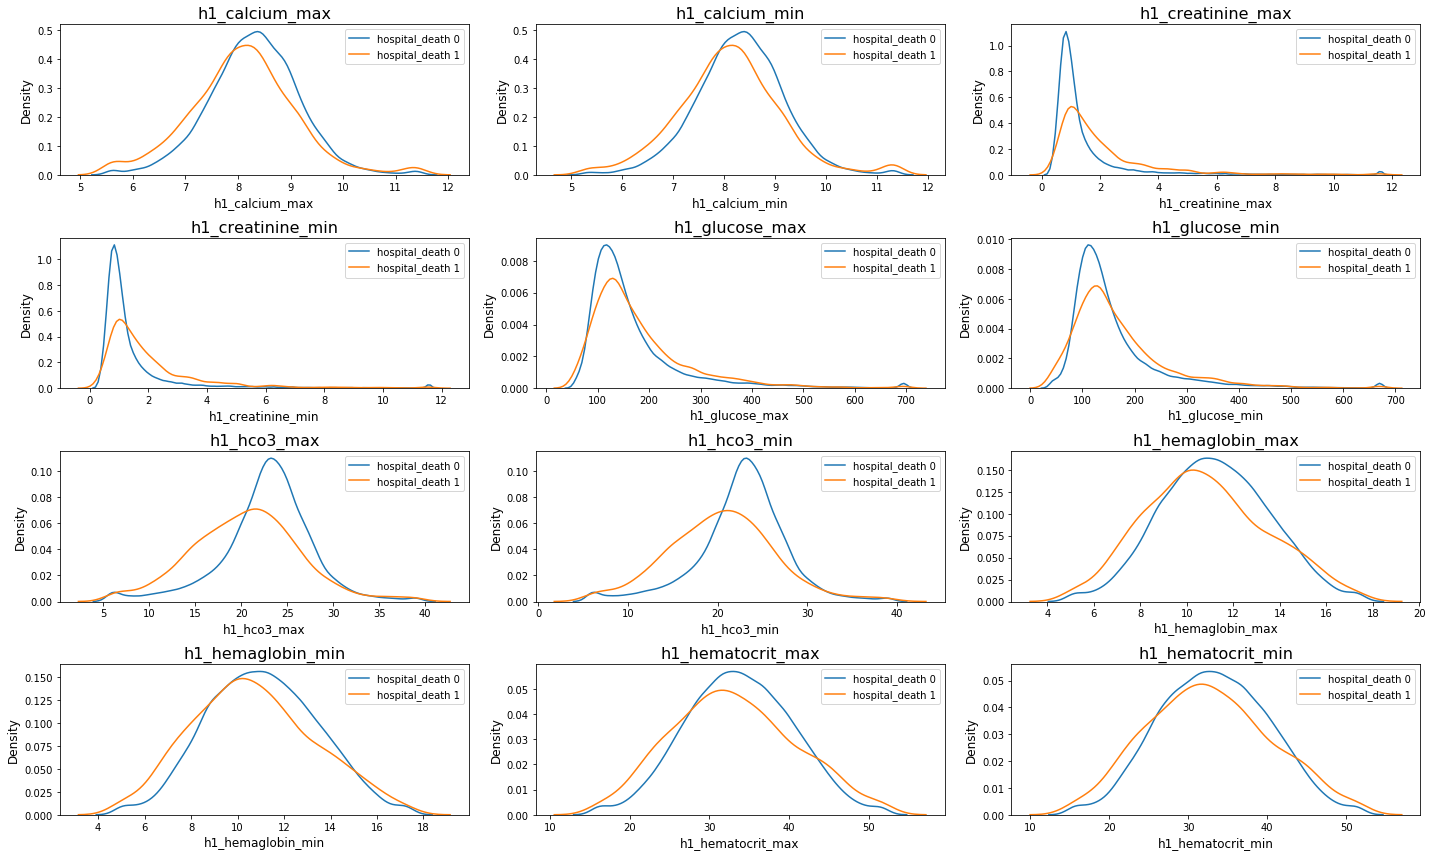

In [50]:
ls_4=ls[36:48]
fig= plt.subplots(figsize=(20, 12))
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = labs_train[labs_train.hospital_death == 0]
    sns.distplot(df[ls_4[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_train[labs_train.hospital_death == 1]
    sns.distplot(df[ls_4[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_4[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_4[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

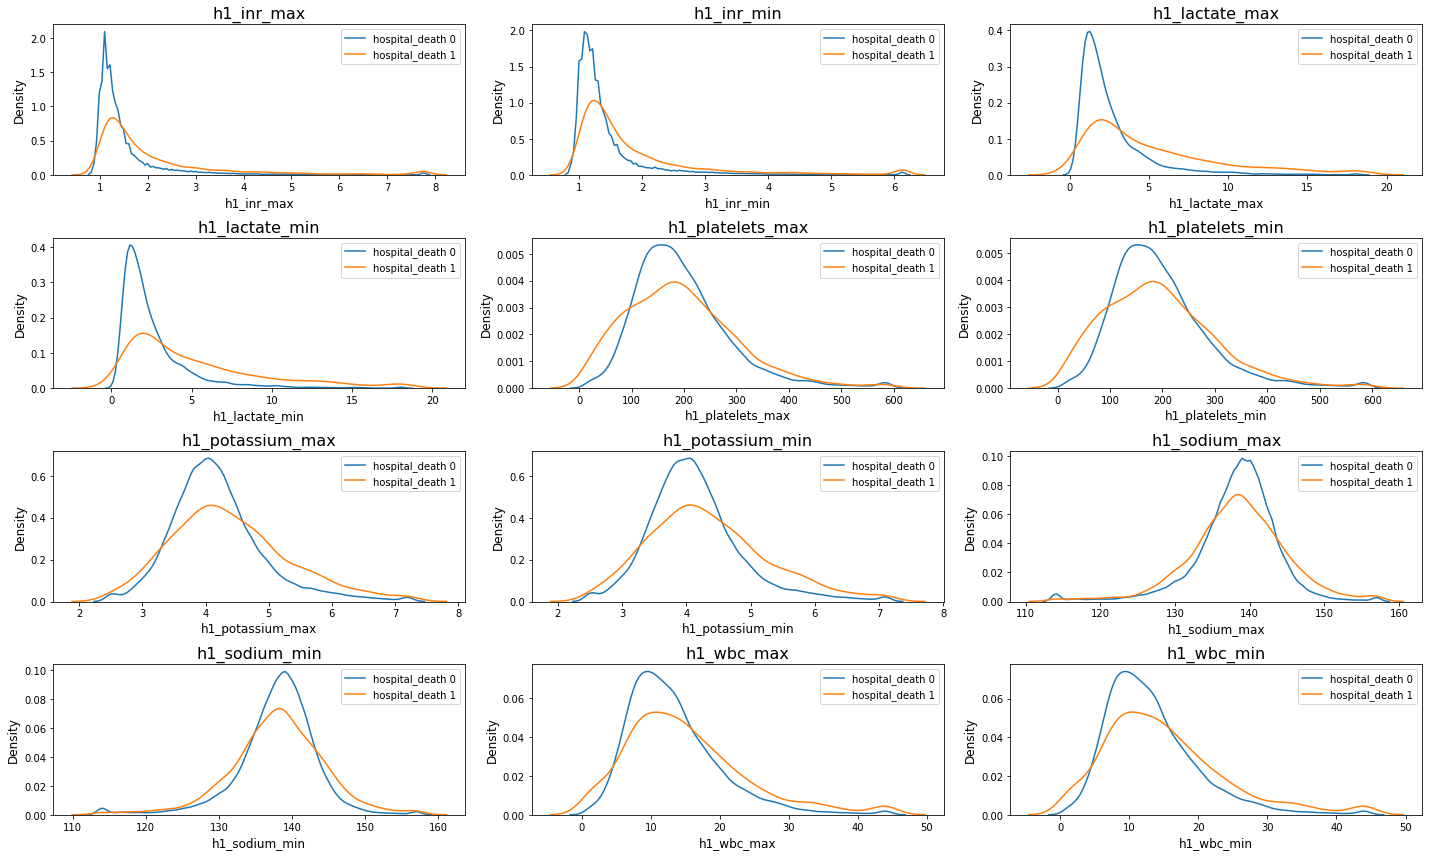

In [51]:
ls_5=ls[48:60]
fig= plt.subplots(figsize=(20, 12))
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax11 = plt.subplot2grid((4, 3), (3, 1))
ax12 = plt.subplot2grid((4, 3), (3, 2))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12))

for i in range(12):
    df = labs_train[labs_train.hospital_death == 0]
    sns.distplot(df[ls_5[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_train[labs_train.hospital_death == 1]
    sns.distplot(df[ls_5[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_5[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_5[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()   

#### Correlation between labs features and hospital_death

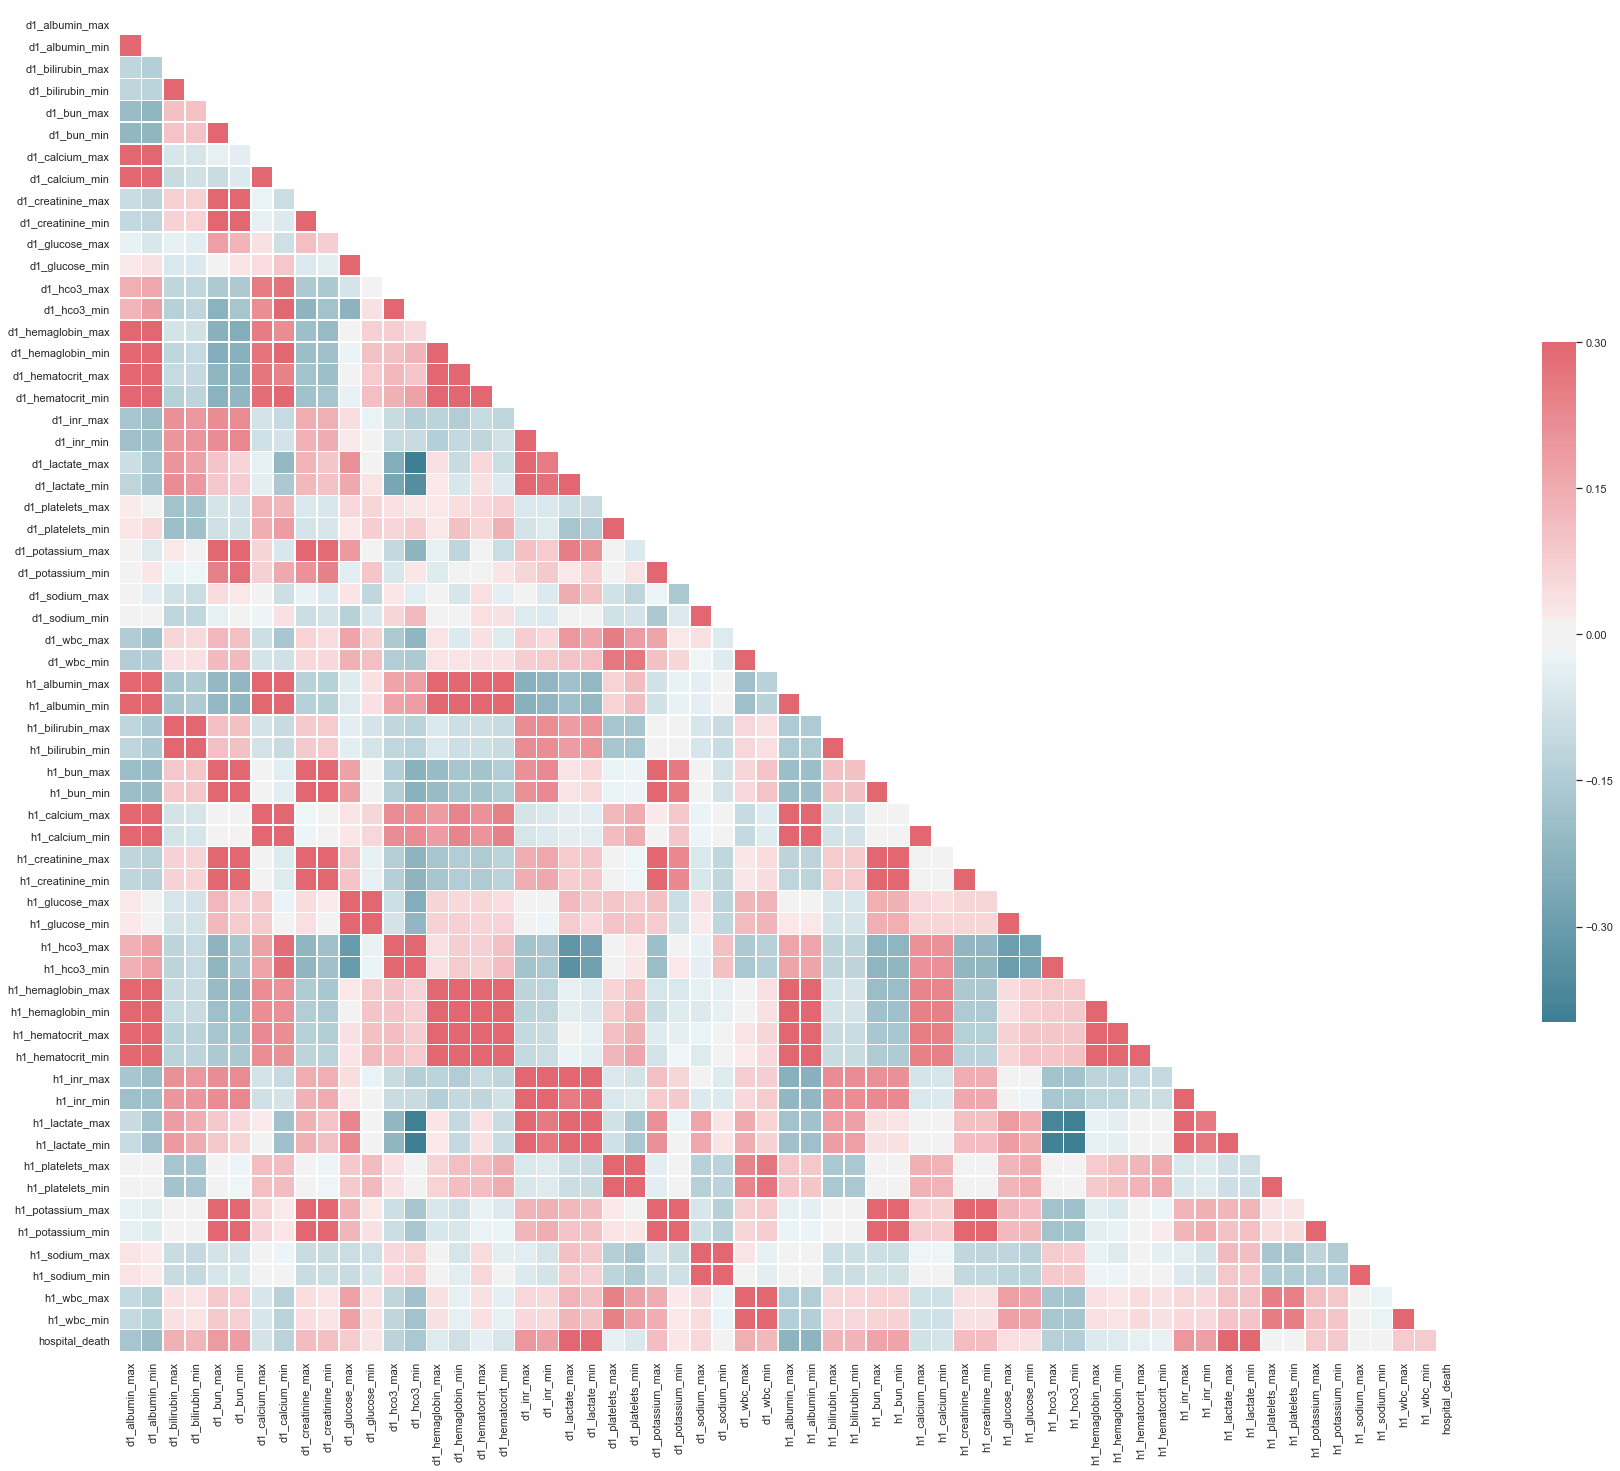

In [139]:
corr=labs_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=False,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some labs features are highly correlated with each other. And many of them have high impact on hospital death.

### Visualization of labs_blood_gas features

In [52]:
labs_blood_gas_train['hospital_death']=train.hospital_death

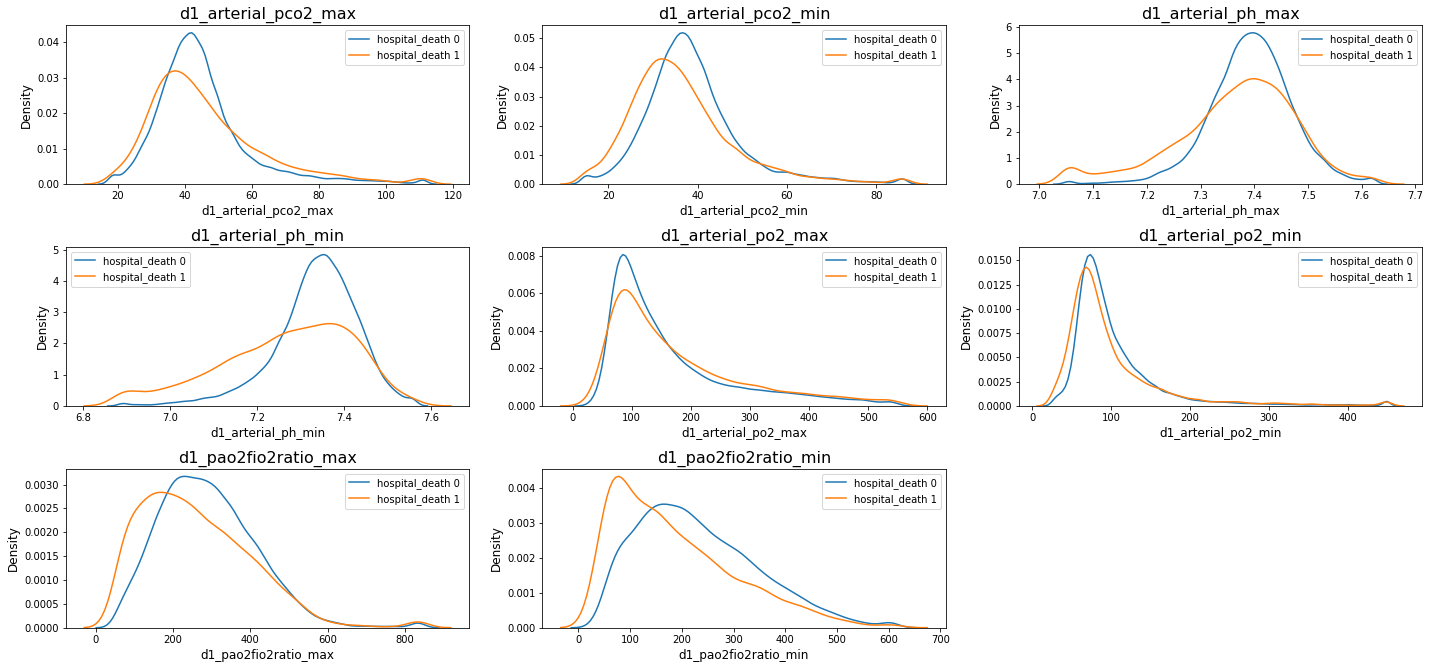

In [54]:
ls=list(labs_blood_gas_train.columns)
ls_1=ls[0:8]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))

for i in range(8):
    df = labs_blood_gas_train[labs_blood_gas_train.hospital_death == 0]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_blood_gas_train[labs_blood_gas_train.hospital_death == 1]
    sns.distplot(df[ls_1[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_1[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_1[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

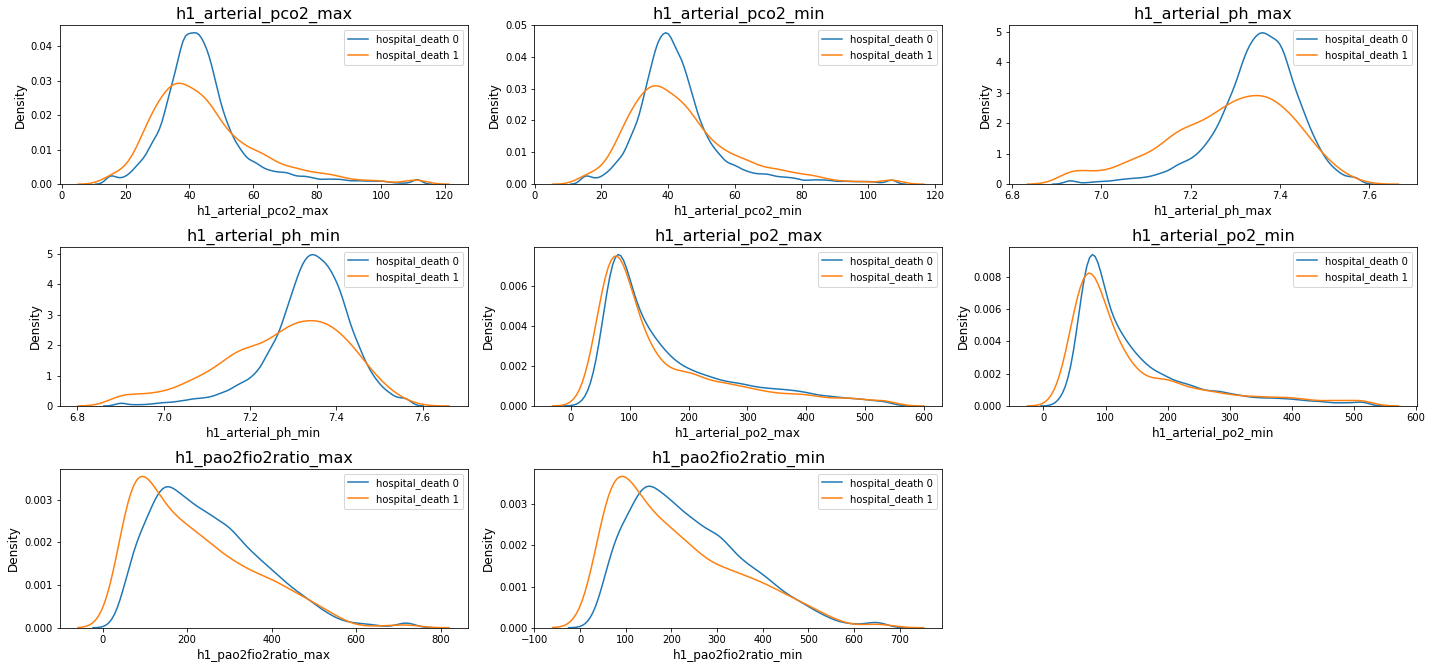

In [56]:
ls_2=ls[8:16]

fig= plt.subplots(figsize=(20, 12))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax8 = plt.subplot2grid((4, 3), (2, 1))

ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))

for i in range(8):
    df = labs_blood_gas_train[labs_blood_gas_train.hospital_death == 0]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 0', ax=ax[i])
    df = labs_blood_gas_train[labs_blood_gas_train.hospital_death == 1]
    sns.distplot(df[ls_2[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls_2[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls_2[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()  

#### Correlation between labs_blood_gas features and hospital_death

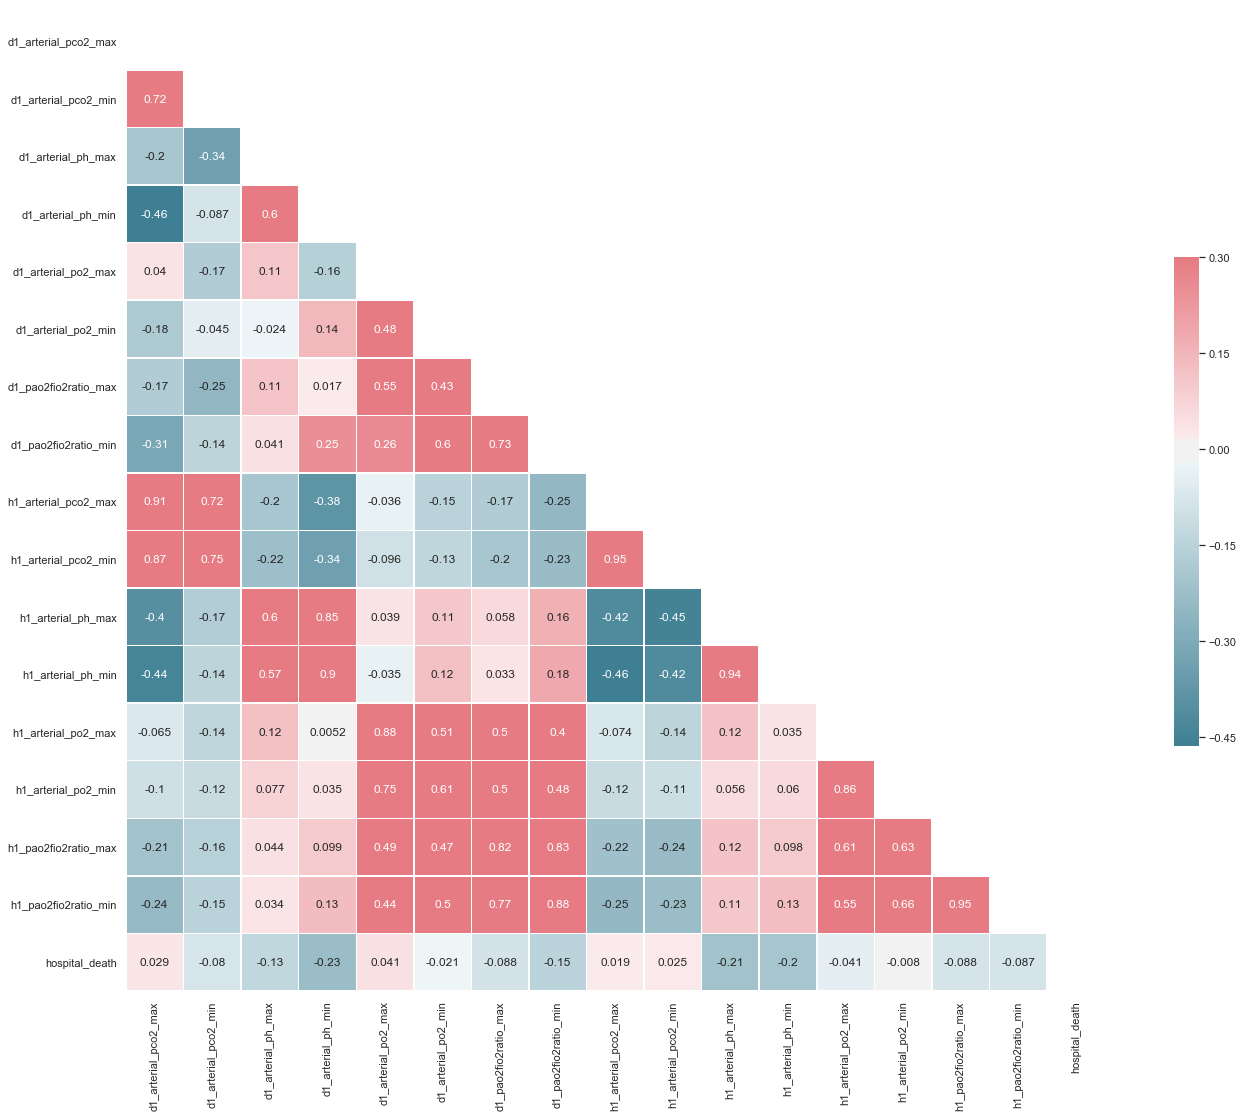

In [141]:
corr=labs_blood_gas_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some of labs_blood_gas features are highly correlated with each other. And some of them have high impact on hospital death.

### Visualization of APACHE prediction features

In [48]:
APACHE_prediction_train['hospital_death']=train.hospital_death

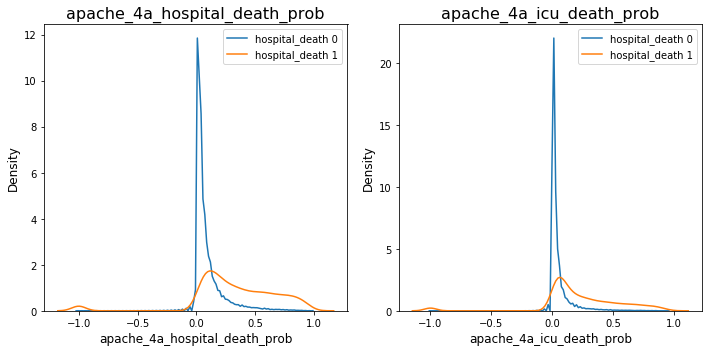

In [50]:
ls=list(APACHE_prediction_train.columns)

fig= plt.subplots(figsize=(10, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax=[]
ax.extend((ax1,ax2))

for i in range(2):
    df = APACHE_prediction_train[APACHE_prediction_train.hospital_death == 0]
    sns.distplot(df[ls[i]], hist=False, kde = True, label='hospital_death 0', ax=ax[i])
    df = APACHE_prediction_train[APACHE_prediction_train.hospital_death == 1]
    sns.distplot(df[ls[i]], hist =False, kde = True, label='hospital_death 1', ax=ax[i])
    
    ax[i].set_xlabel(ls[i], fontsize=12)
    ax[i].set_ylabel('Density', fontsize=12)
    ax[i].set_title(ls[i], fontsize=16)
    plt.tight_layout()
    i += 1
    
plt.show()    

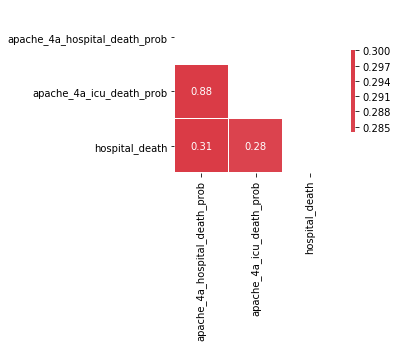

In [21]:
corr=APACHE_prediction_train.corr(method='pearson')
#sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5, 3))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the above plots, both of these two features affect hospital death.

From the distribution of these two features, there are some values equal to -1. It's not reasonable because both of them are probability. I would like to replace all negative values with NA.

In [35]:
APACHE_prediction_train[APACHE_prediction_train.apache_4a_hospital_death_prob==-1].apache_4a_hospital_death_prob.count()

2371

In [44]:
APACHE_prediction_train[APACHE_prediction_train.apache_4a_icu_death_prob<0].apache_4a_icu_death_prob.count()

2230

In [51]:
train['apache_4a_hospital_death_prob']=train['apache_4a_hospital_death_prob'].replace(-1, np.nan)

In [52]:
train['apache_4a_icu_death_prob']=train['apache_4a_icu_death_prob'].replace(-1, np.nan)

### Visualization of APACHE comorbidity features

In [62]:
APACHE_comorbidity_train['hospital_death']=train.hospital_death

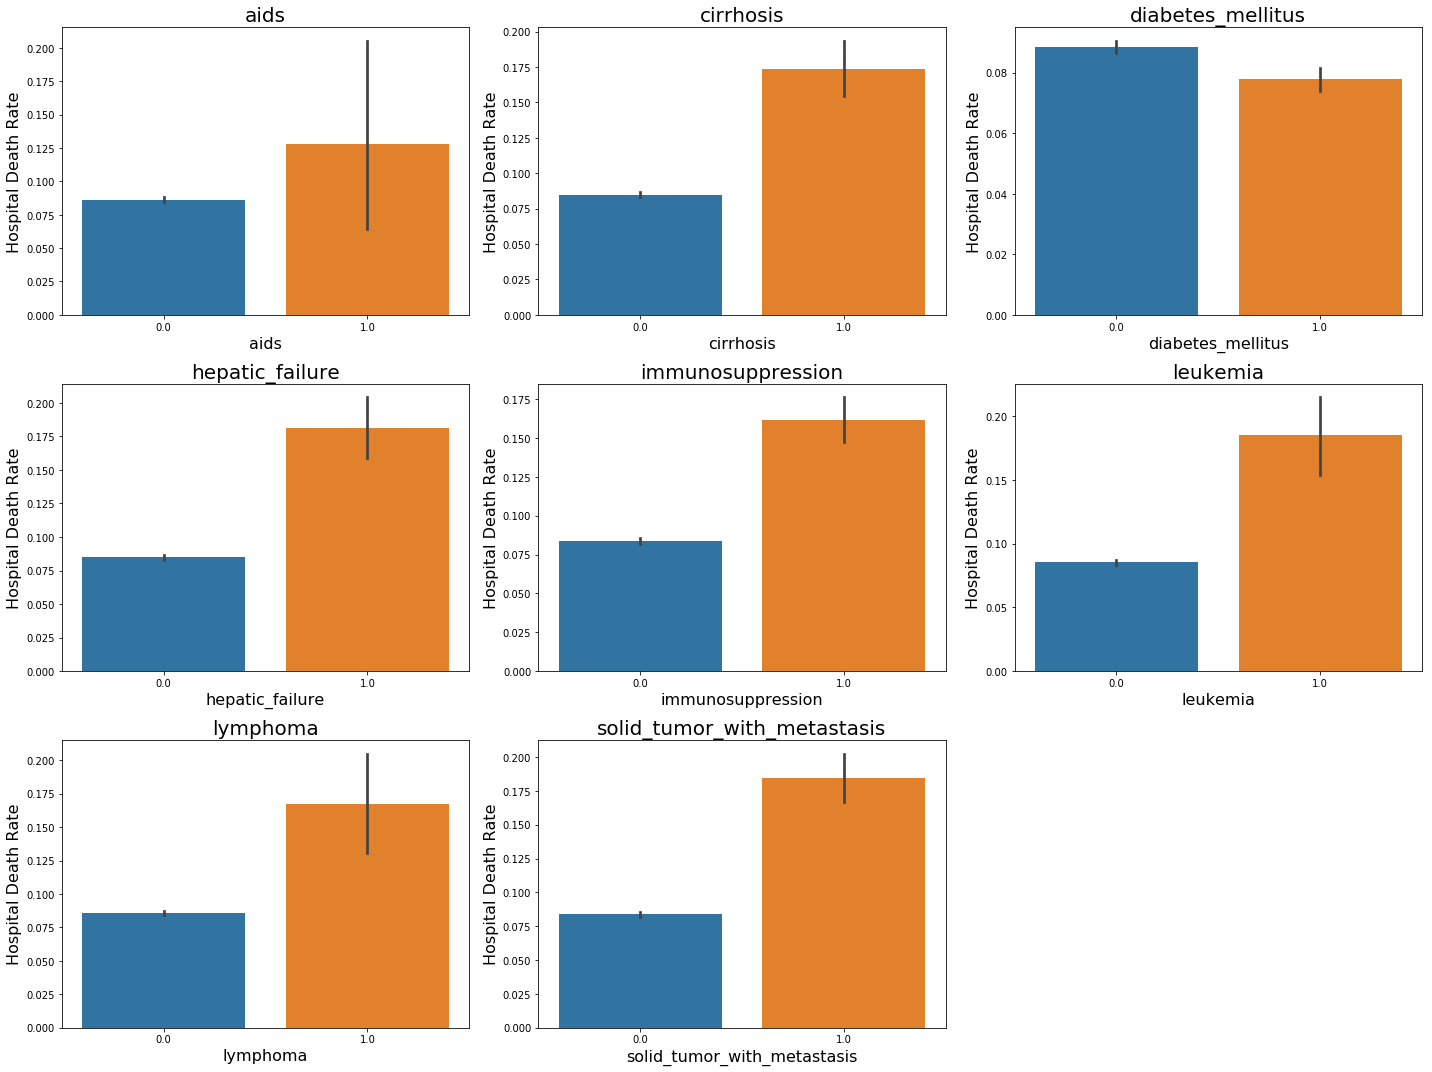

In [76]:
ls=list(APACHE_comorbidity_train.columns)
fig= plt.subplots(figsize=(20, 15))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax=[]
ax.extend((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=APACHE_comorbidity_train
for i in range(8):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    
    plt.tight_layout()
    i += 1
    

plt.show()


Except diabetes_mellitus, all other features contribute to hospital death rate.

### Visualization of APACHE grouping features

In [77]:
APACHE_grouping_train['hospital_death']=train.hospital_death

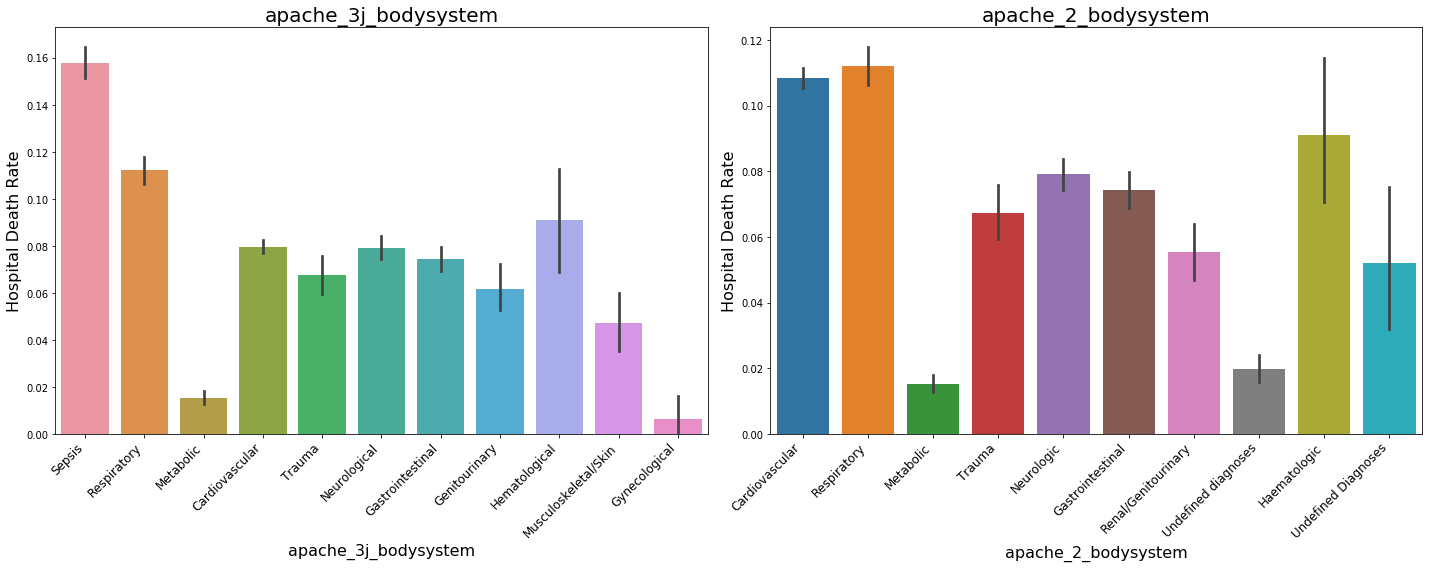

In [81]:
ls=list(APACHE_grouping_train.columns)

fig= plt.subplots(figsize=(20, 8))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax=[]
ax.extend((ax1,ax2))

plt.subplots_adjust(wspace =0.3, hspace = 0.3) #make the figure look better
df=APACHE_grouping_train
for i in range(2):
    sns.barplot(x=df[ls[i]], y='hospital_death', data=df, ax=ax[i])
    ax[i].set_xlabel(ls[i], fontsize=16)
    ax[i].set_ylabel('Hospital Death Rate', fontsize=16)
    ax[i].set_title(ls[i], fontsize=20)
    plt.setp(ax[i].xaxis.get_majorticklabels(),rotation=45,horizontalalignment='right', fontsize=12)
    plt.tight_layout()
    i += 1
    

plt.show()


The effect of two features above varies among different categories.